#**OBJECTIVE**
 Conduct a comprehensive data analysis project on a fictional retail company's sales data, focusing on foundational data science skills and project management.

## Import libraries, Load data



In [ ]:
# @title connection to google drive
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title import libraries
# Importing NumPy library for numerical operations
import numpy as np
# Importing Pandas library for data manipulation and analysis
import pandas as pd
#import itertool to make all possible features combination in ML
import itertools as iter


# Importing statistics libraries
import statistics
import scipy.stats as stats
import math
import scipy

#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for ANOVA and T-Test
from scipy.stats  import f_oneway,f
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,silhouette_score,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



# Importing warnings module to handle warnings
import warnings
# Filtering out warnings to ignore them
warnings.filterwarnings("ignore")


#set  plot style
plt.style.use('Solarize_Light2')

In [ ]:
# @title load the data file
# Reading the CSV file into a DataFrame called 'Project_df' using the read_csv() function
Project_df = pd.read_csv("/content/drive/MyDrive/TechPro/dataScienceProject_dataset.csv")  #here you should put your path to the csv file


##  Information and first rows of our dataframe


In [ ]:
#make a copy of the dataframe
df = Project_df.copy()

#basic info of our DataFrame
df.info()

# Displaying the first few rows of the DataFrame using the head() function
display(df.head(10))

#basic stats
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SalesDate         1000 non-null   object
 1   ProductCategory   1000 non-null   object
 2   SalesAmount       1000 non-null   object
 3   CustomerAge       1000 non-null   int64 
 4   CustomerGender    1000 non-null   object
 5   CustomerLocation  998 non-null    object
 6   ProductRatings    1000 non-null   object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings
0,2023-10-15,Home Appliances,609,22,Male,USA,4
1,2023-09-16,Clothing,1367,22,Female,Australia,5
2,2022-09-06,Electronics,1736,22,Male,UK,2
3,2023-02-24,Female,1838,35,Clothing,India,2
4,2022-09-24,Home Appliances,1829,35,Male,UK,5
5,2023-08-15,Clothing,379,22,Male,Australia,3
6,2022-07-19,Clothing,1459,35,Male,USA,5
7,12-09-2023,Clothing,1656,35,Male,USA,3
8,2022-08-07,Electronics,366,35,Male,Canada,2
9,2023-12-04,Clothing,1875,35,Female,UK,10


,CustomerAge
count,1000.000000
mean,29.177000
std,11.680844
min,2.000000
25%,22.000000
50%,22.000000
75%,35.000000
max,200.000000


## **COLUMNS DESCRIPTION**

*  **SalesDate** (date in YYYY-MM-DD format  – text)
*  **ProductCategory** (Categorical variable – {Clothing, Electronics, Home Appliances} – text)
*   **SalesAmount** (numeric in $)
*   **CustomerAge** (Categorical variable – int64 )
*   **CustomerGender** (Categorical variable – {Male, Female, Non-binary} – text)
*   **CustomerLocation** (Categorical variable – {Japan, Australia, India, USA, UK, Canada} – text)
* **ProductRatings** (Categorical variable – {1 = low to 5 = high rating} – text)


#**Data cleaning and preparation.**

Upon initial review, we identified two missing values ("NaN") in the "Customer Location" column. We observed that only the "Customer Age" column contains numerical data, with a maximum value of 200. We will conduct a more comprehensive examination of each data column to identify and address any inconsistencies, missing values, or invalid entries.

In [ ]:
#check if there are null or emtpy values, how many and in which column
print(df.isnull().sum())
print(df.isin(['']).sum())

SalesDate           0
ProductCategory     0
SalesAmount         0
CustomerAge         0
CustomerGender      0
CustomerLocation    2
ProductRatings      0
dtype: int64
SalesDate           0
ProductCategory     0
SalesAmount         0
CustomerAge         0
CustomerGender      0
CustomerLocation    0
ProductRatings      0
dtype: int64


## **SALES DATE**

the 'SalesDate' entries are currently stored as strings rather than dates. Additionally, it appears that one or more entries may not be formatted consistently with the others. To address this inconsistency, the format of the 'SalseDate' entries will be standardized (YYYY-MM-DD) and any formatting errors will be corrected. We will create three new column with extraction data from SalesData entries. A column that will have only the year of the sale, a column that wiil have the month and a column with a combination of that info, year and month together. Those new columns wilλ help us analyse better the SalesAmount per year and per month.


In [ ]:
#check the first 10  entries of the column

df["SalesDate"].head(10)

0    2023-10-15
1    2023-09-16
2    2022-09-06
3    2023-02-24
4    2022-09-24
5    2023-08-15
6    2022-07-19
7    12-09-2023
8    2022-08-07
9    2023-12-04
Name: SalesDate, dtype: object

In [ ]:
# turn every date into YYYY-MM-DD  and datetime format
df["SalesDate"] = pd.to_datetime(df["SalesDate"], format='mixed',yearfirst=True)

In [ ]:
#make some new columns from date. year,month and Y-M for statistical analysis
df["SalesYear"]=df['SalesDate'].dt.strftime('%Y')
df["SalesMonth"]=df['SalesDate'].dt.strftime('%b')


df["Salesym"] = df["SalesMonth"] + "_" + df["SalesYear"]


df.sort_values(by=['SalesDate'], inplace=True) #sort the dataframe by Sales Date
df.reset_index(inplace=True, drop=True) #reset the index and drop the previous index

## **PRODUCT CATEGORY**
It looks like there's a mistake on line 3. The "ProductCategory   " and "CustomerGender" entries seem to be switched. We'll swap them back to the right columns, but first we'll double-check for any other errors in the data.

In [ ]:
#check how many values are in this column and their counts
df.ProductCategory.value_counts()

ProductCategory
Electronics        357
Clothing           326
Home Appliances    316
Female               1
Name: count, dtype: int64

There is one "Female" value in our Product Categoriy, we must investigatge

In [ ]:
#find the index of the "Female" product and print the row
prod_index_error = df.index[df["ProductCategory"]=="Female"].tolist()
df.loc[prod_index_error]

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
536,2023-02-24,Female,1838,35,Clothing,India,2,2023,Feb,Feb_2023


everything seems fine with the entry, except the swiched entries on 2 columns

In [ ]:
prod_temp = df.loc[prod_index_error, 'ProductCategory']  # Store the value from ProductCategory
df.loc[prod_index_error, 'ProductCategory'] = df.loc[prod_index_error, 'CustomerGender']  # Update ProductCategory with the value from CustomerGender
df.loc[prod_index_error, 'CustomerGender'] = prod_temp # Update CustomerGender with the value from ProductCategory
df.loc[prod_index_error]  #print the row

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
536,2023-02-24,Clothing,1838,35,Female,India,2,2023,Feb,Feb_2023


In [ ]:
#check again how many values are to see if everything is ok
df["ProductCategory"].value_counts()

ProductCategory
Electronics        357
Clothing           327
Home Appliances    316
Name: count, dtype: int64

## **CUSTOMER GENDER**

The data shows a majority of entries for male and female genders. There are 23 entries with unknown genders, 1 person who chose not to answer, and 4 individuals who identify as non-binary.

For the purposes of this analysis, the data for the person who chose not to answer and the 4 non-binary individuals will be included in the "Unknown Gender" category. This decision prioritizes clarity in presentation while acknowledging the limitations of the current data collection.

In [ ]:
#check how many values are in this column and their counts
df["CustomerGender"].value_counts()

CustomerGender
Male              488
Female            484
Unknown            23
Non-binary          4
Did not answer      1
Name: count, dtype: int64

In [ ]:
#find all the indexes with Non binary and Didn't answer as entries
gender_index_extra =  df.index[(df["CustomerGender"] == "Did not answer") | (df["CustomerGender"] == "Non-binary") ].tolist()
#print the entries
df.loc[gender_index_extra].CustomerGender

11         Non-binary
567        Non-binary
672        Non-binary
738    Did not answer
785        Non-binary
Name: CustomerGender, dtype: object

In [ ]:
#assign them on the Unknown category
df.loc[gender_index_extra, 'CustomerGender'] = "Unknown"
#prin the fixed entries to check if everything went well
df.loc[gender_index_extra].CustomerGender

11     Unknown
567    Unknown
672    Unknown
738    Unknown
785    Unknown
Name: CustomerGender, dtype: object

In [ ]:
#check the new value counts
df["CustomerGender"].value_counts()

CustomerGender
Male       488
Female     484
Unknown     28
Name: count, dtype: int64

## **CUSTOMER LOCATION**
We identified two rows with missing values (NaN) in the 'Customer Location' column. We choose deletion for the statistical analysis and store the removed rows for potential future use.

In [ ]:
#check again the info and see the non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SalesDate         1000 non-null   datetime64[ns]
 1   ProductCategory   1000 non-null   object        
 2   SalesAmount       1000 non-null   object        
 3   CustomerAge       1000 non-null   int64         
 4   CustomerGender    1000 non-null   object        
 5   CustomerLocation  998 non-null    object        
 6   ProductRatings    1000 non-null   object        
 7   SalesYear         1000 non-null   object        
 8   SalesMonth        1000 non-null   object        
 9   Salesym           1000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 78.2+ KB


In [ ]:
#find the indexes and print those entries
locations_index= df[df['CustomerLocation'].isnull()].index.tolist()

for i in locations_index:
  print(f'{df.loc[i]}\n')

SalesDate           2022-02-08 00:00:00
ProductCategory                Clothing
SalesAmount                        1563
CustomerAge                          35
CustomerGender                     Male
CustomerLocation                    NaN
ProductRatings                        5
SalesYear                          2022
SalesMonth                          Feb
Salesym                        Feb_2022
Name: 57, dtype: object

SalesDate           2022-11-16 00:00:00
ProductCategory             Electronics
SalesAmount                        1547
CustomerAge                          35
CustomerGender                     Male
CustomerLocation                    NaN
ProductRatings                        3
SalesYear                          2022
SalesMonth                          Nov
Salesym                        Nov_2022
Name: 408, dtype: object



In [ ]:
#check the shape of our dataframe
df.shape

(1000, 10)

In [ ]:
#store the Nan values into a new dataframe
df_location_nan = df.loc[locations_index]
df_location_nan

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
57,2022-02-08,Clothing,1563,35,Male,NaN,5,2022,Feb,Feb_2022
408,2022-11-16,Electronics,1547,35,Male,NaN,3,2022,Nov,Nov_2022


In [ ]:
#we will delete the Nan values because the small amaount , only 2/1000 = 0.2%
df.dropna(subset = ['CustomerLocation'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
#print the new shape to see if we only erased the two rows
df.shape

(998, 10)

In [ ]:
df["CustomerLocation"].value_counts()

CustomerLocation
USA          207
UK           203
Canada       201
India        167
Australia    113
Japan        107
Name: count, dtype: int64

##**PRODUCT RATINGS**
We identified two entries containing text. These will be converted to numbers. There's also a single entry with the value "10", which falls outside our expected range of 1 to 5. Since we're unsure if this is a data entry error or a valid outlier, we will exclude this particular entry from the analysis.

In [ ]:
print(df.ProductRatings.dtypes)

object


In [ ]:
#check how many values are in this column and their counts
df.ProductRatings.value_counts()

ProductRatings
3      219
2      207
1      196
4      189
5      184
two      1
one      1
10       1
Name: count, dtype: int64

In [ ]:
#find the indexes of text values (where the entry is non numeric)
rating_error =  df.index[~df["ProductRatings"].str.isnumeric()].tolist()
for i in rating_error:
    print(f'{df.loc[i]}\n')

SalesDate           2023-04-16 00:00:00
ProductCategory         Home Appliances
SalesAmount                         801
CustomerAge                          22
CustomerGender                     Male
CustomerLocation                    USA
ProductRatings                      two
SalesYear                          2023
SalesMonth                          Apr
Salesym                        Apr_2023
Name: 614, dtype: object

SalesDate           2023-10-21 00:00:00
ProductCategory                Clothing
SalesAmount                        1822
CustomerAge                          22
CustomerGender                     Male
CustomerLocation                 Canada
ProductRatings                      one
SalesYear                          2023
SalesMonth                          Oct
Salesym                        Oct_2023
Name: 883, dtype: object



In [ ]:
#fix the text values assinging the numerical rating
df.loc[rating_error[0], 'ProductRatings'] = "2"
df.loc[rating_error[1], 'ProductRatings'] = "1"
#check the fixed entries
for i in rating_error:
    print(f'{df.loc[i]}\n')

SalesDate           2023-04-16 00:00:00
ProductCategory         Home Appliances
SalesAmount                         801
CustomerAge                          22
CustomerGender                     Male
CustomerLocation                    USA
ProductRatings                        2
SalesYear                          2023
SalesMonth                          Apr
Salesym                        Apr_2023
Name: 614, dtype: object

SalesDate           2023-10-21 00:00:00
ProductCategory                Clothing
SalesAmount                        1822
CustomerAge                          22
CustomerGender                     Male
CustomerLocation                 Canada
ProductRatings                        1
SalesYear                          2023
SalesMonth                          Oct
Salesym                        Oct_2023
Name: 883, dtype: object



In [ ]:
#store the 10 error value into a new dataframe
df_rating_error =  df.loc[df.index[df["ProductRatings"]== "10"].tolist()]
df_rating_error

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
947,2023-12-04,Clothing,1875,35,Female,UK,10,2023,Dec,Dec_2023


In [ ]:
#check the shape before delete entries
df.shape

(998, 10)

In [ ]:
#delete the entry with rating:"10" as we don't have more information
df = df.drop(df[df['ProductRatings'] == '10'].index)
df.reset_index(inplace=True, drop=True)  #reset the index and drop the previous index

In [ ]:
#check the shape again to see if we only delete what we want
df.shape

(997, 10)

In [ ]:
#check how many values are in this column and their counts
df.ProductRatings.value_counts()

ProductRatings
3    219
2    208
1    197
4    189
5    184
Name: count, dtype: int64

## **CUSTOMER AGE**
Our data appears to contain ten outliers in the customer age column. Entries with ages exceeding 95 and reaching nearly 200, along with a customer aged 2, are likely data errors. These values deviate significantly from the expected range for this specific context (customers buying items).

We will user the Interquartile Range (IQR) method to identify the outliers in the customer age data. Entries classified as outliers using this method will be excluded from our dataset.

The entry with age 20 we will be  added  to the 22 category, again for clarity in our percentation. At the end we will have only two categories 22 and 35

In [ ]:
#check how many values are in this column and their counts
df.CustomerAge.value_counts()

CustomerAge
22     506
35     480
105      2
120      1
2        1
101      1
100      1
95       1
20       1
180      1
112      1
200      1
Name: count, dtype: int64

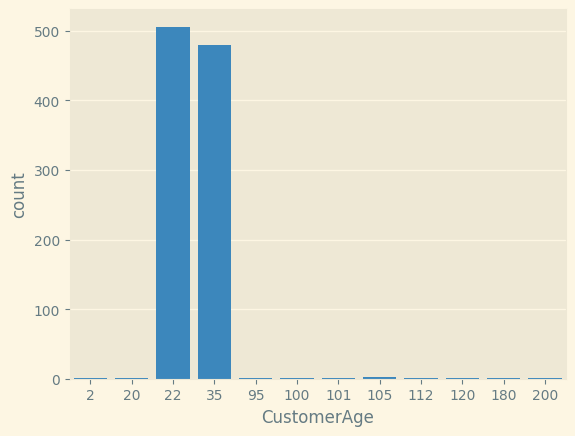

In [ ]:
#plot the counts of every value
sns.countplot(data=df,x="CustomerAge")
plt.show()

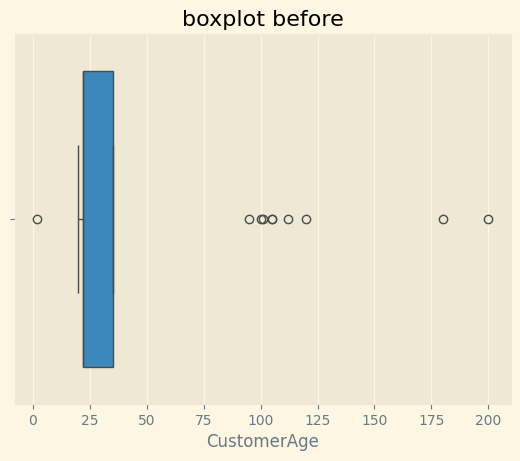

In [ ]:
#plot the boxplot of Age data to check the outliers
sns.boxplot(data=df,x="CustomerAge")
plt.title("boxplot before")
plt.show()

In [ ]:
#Run the IQR method to find the limits for outliers
Q1 = df["CustomerAge"].quantile(0.25)  #using the quantile function to find the value at the first quartile of the dataset data.
Q3 = df["CustomerAge"].quantile(0.75)  #same for the third quartile

IQR = Q3 - Q1 #calcuate the IQR method
low_limit= Q1 - 1.5*IQR #calcuate the low limit
high_limit= Q3 + 1.5*IQR #calcuate the high limit

print(f'the results for CustomerAge:\nQ1_CustomerAge = {Q1}\nQ3_CustomerAge = {Q3}\nIQR_CustomerAge = {IQR}\n')
print(f'low limit = {low_limit}')
print(f'high limit = {high_limit}')

the results for CustomerAge:
Q1_CustomerAge = 22.0
Q3_CustomerAge = 35.0
IQR_CustomerAge = 13.0

low limit = 2.5
high limit = 54.5


In [ ]:
#create a mask for those outliers
mask_age = ((df['CustomerAge'] > 54) | (df['CustomerAge'] < 3))
#print how many outliers we have(True value)
print(mask_age.value_counts())

#find the indexes of the oultiers
mask_age_index =  df.index[(df['CustomerAge'] > 54) | (df['CustomerAge'] < 3)].tolist()

df_age_error =  df.loc[mask_age_index] #store the error values into a new dataframe
df_age_error

CustomerAge
False    987
True      10
Name: count, dtype: int64


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
61,2022-02-12,Electronics,1709,105,Male,Canada,5,2022,Feb,Feb_2022
121,2022-03-30,Home Appliances,785,120,Female,USA,5,2022,Mar,Mar_2022
326,2022-09-11,Electronics,1096,2,Male,UK,4,2022,Sep,Sep_2022
341,2022-09-24,Electronics,173,101,Female,UK,1,2022,Sep,Sep_2022
434,2022-12-06,Clothing,939,100,Male,Canada,2,2022,Dec,Dec_2022
567,2023-03-23,Clothing,779,95,Female,Japan,1,2023,Mar,Mar_2023
628,2023-04-28,Electronics,1621,180,Male,Canada,5,2023,Apr,Apr_2023
732,2023-07-06,Electronics,1547,105,Male,India,2,2023,Jul,Jul_2023
841,2023-09-22,Clothing,212,112,Male,UK,3,2023,Sep,Sep_2023
982,2023-12-23,Electronics,1187,200,Male,Canada,1,2023,Dec,Dec_2023


In [ ]:
#drop the outliers and check the new value counts
df.drop(df[(mask_age)].index,inplace=True)
df.reset_index(inplace=True, drop=True)
df.CustomerAge.value_counts()

CustomerAge
22    506
35    480
20      1
Name: count, dtype: int64

In [ ]:
#check if the entry with age =20 looks normal
age_index= df.index[df["CustomerAge"] == 20].tolist()
df.iloc[age_index]

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
578,2023-04-01,Electronics,1755,20,Female,Canada,1,2023,Apr,Apr_2023


In [ ]:
# Combine age 20 with age 22
df.loc[age_index, 'CustomerAge'] =22
df.iloc[age_index]

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
578,2023-04-01,Electronics,1755,22,Female,Canada,1,2023,Apr,Apr_2023


<Axes: xlabel='CustomerAge', ylabel='count'>

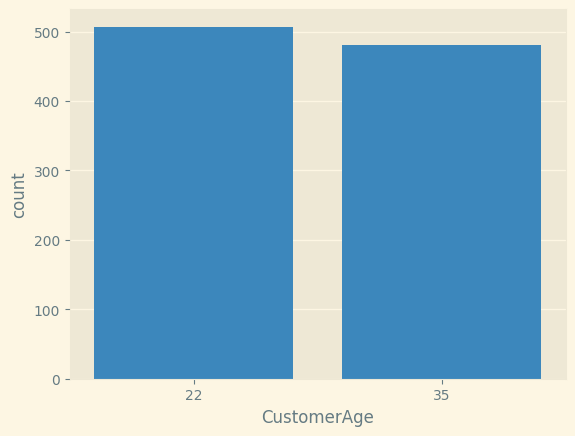

In [ ]:
#check again the countplot
sns.countplot(data=df,x="CustomerAge")


In [ ]:
#change the type of this column because it's categorical and the int type will cause trouble in machine learning and clustering
df['CustomerAge'] = df['CustomerAge'].astype('str')
print(df["CustomerAge"].dtypes)

object


## **SALES AMOUNT**

We identified entries with non-numeric values or numbers containing special characters. These inconsistencies could be typos or represent different data formats (e.g., percentages). Due to the ambiguity, we will exclude them from the analysis to ensure data accuracy.
We found a data point significantly higher than others (1,875,000). This value, known as an outlier, can skew the overall results like the mean. To maintain data integrity, we will address this outlier by excluding it.

In [ ]:
#check how many values are in this column and their counts
df.SalesAmount.value_counts()

SalesAmount
710        14
609        14
466        13
1621       12
1148       12
           ..
1430        1
1875000     1
205         1
445         1
779%        1
Name: count, Length: 189, dtype: int64

In [ ]:
#print the data type
print(df.SalesAmount.dtype)

object


In [ ]:
#find the non numeric values and print them
is_numeric = df['SalesAmount'].str.isnumeric()  #find the numeric values
non_numeric = ~is_numeric #Find the non numeric values

non_numeric_df = df[non_numeric ] #make a dataframe with filtering the non numeric values
non_numeric_df

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
158,2022-04-27,Home Appliances,3-0,35,Unknown,Canada,3,2022,Apr,Apr_2022
776,2023-08-09,Electronics,3-0,35,Female,Japan,3,2023,Aug,Aug_2023
824,2023-09-17,Home Appliances,3-00,35,Male,USA,3,2023,Sep,Sep_2023
828,2023-09-19,Clothing,3-0,22,Female,India,1,2023,Sep,Sep_2023
900,2023-11-08,Electronics,3-0,35,Female,UK,3,2023,Nov,Nov_2023
971,2023-12-22,Clothing,779%,35,Male,Canada,5,2023,Dec,Dec_2023


In [ ]:
#check the shape of dataframe before beleting entries
df.shape

(987, 10)

In [ ]:
#delete those entries
df.drop(df[(non_numeric)].index,inplace=True)
df.reset_index(inplace=True, drop=True)

#check the new shape
df.shape

(981, 10)

In [ ]:
#check the data type of Sales Amount
df.SalesAmount.dtypes

dtype('O')

In [ ]:
#fix the data type to numeric
df["SalesAmount"] = pd.to_numeric(df['SalesAmount'])
df.SalesAmount.dtypes

dtype('int64')

In [ ]:
pd.options.display.float_format = '{:.0f}'.format #change the way pandas display number because is shown Sales amount with e+ format
#check the basic stats of our Dataframe
df.describe()


,SalesDate,SalesAmount
count,981,981
mean,2023-01-11 16:42:34.128440576,2890
min,2022-01-02 00:00:00,22
25%,2022-07-03 00:00:00,510
50%,2023-01-26 00:00:00,987
75%,2023-07-16 00:00:00,1428
max,2023-12-31 00:00:00,1875000
std,NaN,59835


The max of Sales Amount is very big, enormous difference with the 75% and hundren't of times bigger than the mean value

<Axes: xlabel='SalesAmount'>

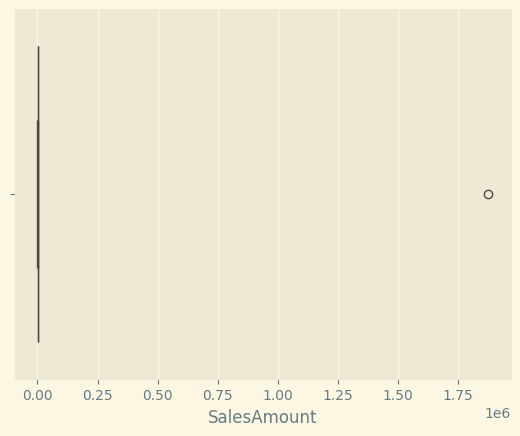

In [ ]:
#plot the boxplot to check for the outlier
sns.boxplot(data=df,x="SalesAmount")

this value is clearly an error. We will excluded from our analysis

In [ ]:
#store the error value into a new dataframe
sales_outlier =  df.index[df["SalesAmount"]== 1875000].tolist()  #find the index of the outlier
df_sales_outlier =  df.loc[sales_outlier]  #store the outlier into a new dataframe
df_sales_outlier

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
61,2022-02-13,Electronics,1875000,22,Male,Australia,2,2022,Feb,Feb_2022


In [ ]:
#check the shape of our dataframe before delete the entry
df.shape

(981, 10)

In [ ]:
#drop this entry and reset the index
df.drop(df[df['SalesAmount'] == 1875000].index,inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
#check the shape  our dataframe after the deletion
df.shape

(980, 10)

In [ ]:
#check again the basic stats of our data
df.describe()

,SalesDate,SalesAmount
count,980,980
mean,2023-01-12 00:51:25.714285568,980
min,2022-01-02 00:00:00,22
25%,2022-07-03 18:00:00,510
50%,2023-01-26 00:00:00,987
75%,2023-07-16 00:00:00,1428
max,2023-12-31 00:00:00,1994
std,NaN,538


<Axes: xlabel='SalesAmount'>

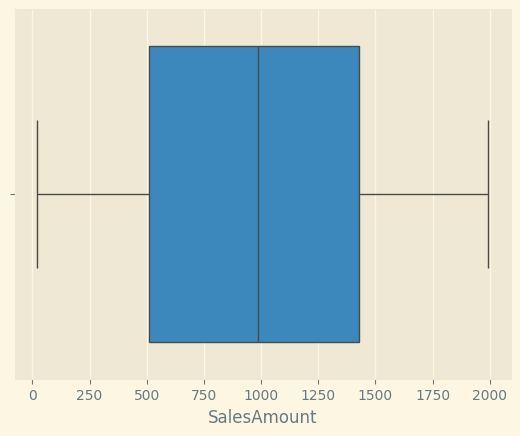

In [ ]:
#check again the boxplot to see if everything is ok
sns.boxplot(data=df,x="SalesAmount")

## Final moves on Data cleaning and preperation

We did non find duplicate data in our dataframe, we store the clean data to a new dataframe. Also make a new dataframe with the exluded data

In [ ]:
#check for duplicated data
df[df.duplicated()]

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym


In [ ]:
#make a copy for the clean data
df_clean=df.copy()

we don't have duplicated entries, our data is now clean to perfmom our analysis

In [ ]:
#store the excluded data into a new dataframe called deleted_rows
deleted_rows = pd.concat([df_location_nan, df_rating_error, df_age_error, non_numeric_df, df_sales_outlier], axis=0)
deleted_rows

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
57,2022-02-08,Clothing,1563,35,Male,NaN,5,2022,Feb,Feb_2022
408,2022-11-16,Electronics,1547,35,Male,NaN,3,2022,Nov,Nov_2022
947,2023-12-04,Clothing,1875,35,Female,UK,10,2023,Dec,Dec_2023
61,2022-02-12,Electronics,1709,105,Male,Canada,5,2022,Feb,Feb_2022
121,2022-03-30,Home Appliances,785,120,Female,USA,5,2022,Mar,Mar_2022
326,2022-09-11,Electronics,1096,2,Male,UK,4,2022,Sep,Sep_2022
341,2022-09-24,Electronics,173,101,Female,UK,1,2022,Sep,Sep_2022
434,2022-12-06,Clothing,939,100,Male,Canada,2,2022,Dec,Dec_2022
567,2023-03-23,Clothing,779,95,Female,Japan,1,2023,Mar,Mar_2023
628,2023-04-28,Electronics,1621,180,Male,Canada,5,2023,Apr,Apr_2023




---



# **Descriptive statistics and Data visualization**

We will begin our analysis by examining basic descriptive statistics for dataset.  Since all columns contain categorical data, we will investigate the relationships between the "Sales Amount" variable and the categories within each column showing the sum and mean of every category. We will also calculate the frequency distribution for each categorical variable. This will show the number of observations (count) for each distinct category within a column.

### **Functions**

In [ ]:
# @title Function for plot annotation

'''
a function that takes as input a horizontal countplot
and annotates the bars with their values.
'''
def annotate_bars(ax):
    for bar in ax.patches:  #for every bar in our balplots
      bar_width = bar.get_width()
      formatted_width = f"{bar_width:,.0f}"
      ax.annotate(formatted_width,
                   (bar.get_width(), bar.get_y() +
                    bar.get_height() / 2),
                    ha='right', va='center_baseline',               #the annotation on the center of this point
                    size=10, color="black",       #the font size and color
                    xytext=(0, 0),                 #size of the annotation and its position relative to the bar
                    textcoords='offset points')
    ax.set_xticklabels([])
    ax.set_ylabel("")

In [ ]:
# @title function fur Sum,Mean,Value_counts stats  and Graphs
'''
a fucntion that takes as input
  a) the name of the dataframe
  b,c) the columns of the dataframe you want to groupby
  d) the name of the plot

and gives as outpout
  a) a new dataframe "sales" with the groupby stats for sum, mean, count, and percentage
  b) creates three plots in one figure for the value counts, sum and average sales
'''


def stats_and_graphs(df,col1,col2,plottile):


  #make a new DataFrame for products sales sum and mean and count values
  freq =  pd.DataFrame(df[col1].value_counts().reset_index())  #calculate the value counts

  freq = freq.sort_values(by=[col1]).reset_index() #sort them alphabeticaly

  sales = pd.DataFrame(df.groupby(df[col1])[col2].agg(['sum','mean']).sort_values(by=[col1]).reset_index()) #sort the group by alphabeticaly

  sales['count'] = freq["count"] #add value counts to dataframe

  sales['Percentage'] = (sales['sum'] / sales['sum'].sum()) * 100  #add percentage column for plotting


   # Create a figure with 1 rows and 3 columns of subplots (for value counts, sum and average)
  fig, axes = plt.subplots(1, 3,sharey=False,sharex=False,figsize=(15,6))  # Adjust figsize for layout
  fig.suptitle(f'{plottile} Distribution by Value Count, Total Sales, and Average Sales', fontsize=20)


  #first plot for value counts
  ax1= sns.barplot(ax=axes[0], y=sales.columns[0],x="count",data=sales,palette="Blues")
  annotate_bars(ax1)
  ax1.set_xlabel("Value Count")



  #second plot for total sales per category
  ax2 = sns.barplot(ax=axes[1],y=sales.columns[0],x="sum",data=sales,palette="Blues")
  annotate_bars(ax2)
  ax2.set_xlabel("Total Sales")


  #third plot for average sales per category
  ax3 = sns.barplot(ax=axes[2], y=sales.columns[0],x="mean",data=sales,palette="Blues")
  annotate_bars(ax3)
  ax3.set_xlabel("Average Sales")

  plt.xticks(visible=False)
  plt.tight_layout()
  plt.show()

## **Basic statistics of our dataset**
*   **SalesDate:** has values from the second day of 2022 until the last day  of 2023. Date with most apperances (6) is 16 Jul, 2023
*   **SalesYear:** Two values, 2022 and 2022 with the later being the most frequent with 525 appearances out of 980
*   **SalesMonth:**values from 1 to 12 as expected, most frequent is May with 91 appearances
*   **Salesym:** 24 for unique values, with most frequent the December 2023 with 52 appearances
*   **Sales Amount :** Min=22 and Max=1994 with  std of 558 we should expect a lot of variance on the values, The MEAN (980) and MEDIAN(987) close value suggests that the distribution might be somewhat symmetrical. The mode(609) is lower than mean and median  so will have a possible right skew in the data distribution
*   **CustomerAge:** 22 is the most frequent value with 505 appearances
*   **CustomerGender:** Three categories in Gender with Femalefemale being the most frequent value with 477 appearances
*   **CustomerLocation:** six countries in the Customer Location column with most frequent the USA with 347 appearances
*   **ProductCategory** Electroniqs the most frequent entry out of three with 205 apperances
*   **ProductRatings:** 5 unique entries for ous scale from 1 to 5 with the most frequent being the 3 with 214 apperances

As mode and median stats show, our average customer
is 22 Female from USA who bought 980$ of Electonics at December of 2023 and gave a rating of 3.

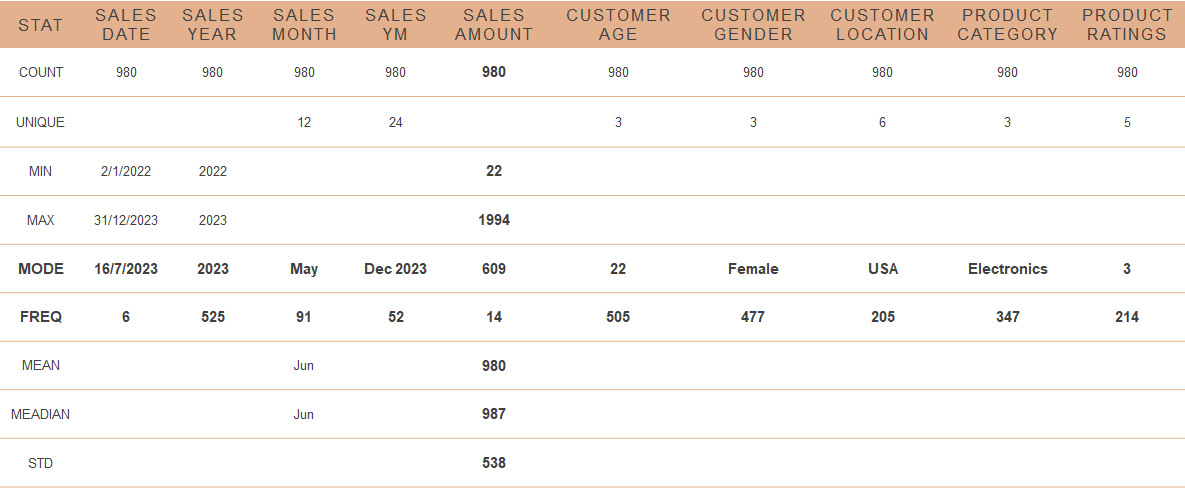

In [ ]:
# @title calculate the basic stats

#____NUMERICAL COLUMNS____

#  describe for numeric variables
print(f'Basic stats for the numeric columns')
display(df.describe())

#for stat:median we find only the numeric values of our dataset
df_numeric = df.select_dtypes(include=[np.number])

# Get the median of numeric columns
median_values = pd.DataFrame(df_numeric.median()) #from those value find the median
median_values = median_values.T #pivot the dataframe for better presentation
median_values = median_values.rename(index={0:'median'})  #change the index name for clarity

print(f'\n Median values for the numerical columns')
display(median_values)


#____CATEGORICAL COLUMNS____

print(f'\nBasic stats for the categorical columns')
# describe for categorical variables
display(df.describe(include=['object']))

#calculate the mode for every category and its count
Value=[]
count=[]
for col in df.columns:  #for every column in the dataframe
  mode_value = df[col].mode().iloc[0]  # Get the first mode value
  mode_count = df[col].value_counts().max() #Get the count of that value
  Value.append(mode_value)  #store the value in a list
  count.append(mode_count)  #store the count in a list

#make a new dataframe with Mode Value and count as rows
mode = pd.DataFrame(columns=df.columns)
mode.loc[0] = Value
mode.loc[1] = count
mode.index= ['Mode','count'] #change the index name for clarity

print(f'\nMode values for the categorical columns')
display(mode)

Basic stats for the numeric columns


,SalesDate,SalesAmount
count,980,980
mean,2023-01-12 00:51:25.714285568,980
min,2022-01-02 00:00:00,22
25%,2022-07-03 18:00:00,510
50%,2023-01-26 00:00:00,987
75%,2023-07-16 00:00:00,1428
max,2023-12-31 00:00:00,1994
std,NaN,538



 Median values for the numerical columns


,SalesAmount
median,987



Basic stats for the categorical columns


,ProductCategory,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
count,980,980,980,980,980,980,980,980
unique,3,2,3,6,5,2,12,24
top,Electronics,22,Female,USA,3,2023,May,Dec_2023
freq,347,505,477,205,214,525,91,52



Mode values for the categorical columns


,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
Mode,2023-07-16 00:00:00,Electronics,609,22,Female,USA,3,2023,May,Dec_2023
count,6,347,14,505,477,205,214,525,91,52


Analyse SALES AMOUNT feature by feature

## **SALES AMOUNT**


The MEAN (980) and MEDIAN (987) being close suggests a somewhat symmetrical distribution in our data. However, the MODE (609) being significantly lower than the other two measures indicates that we don't have a normal distribution. Instead, the data exhibits a right skew. The STANDARD DEVIATION of 538 is moderate relative to the range, implying a moderate spread of the data points

The Highest Sales Amount: 1994 (electronics purchase on September 27th, 2023 from 35year old Female in Australia. The customer was pleased as she rated the product with 4 in a 1to5 scale)

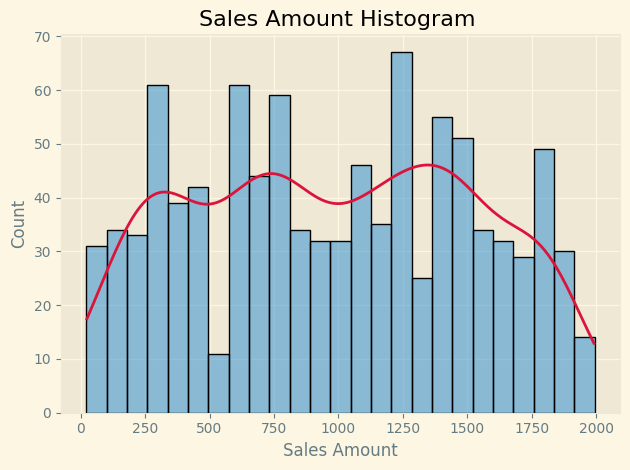

In [ ]:
# @title  Sales amount Histplot
ax = sns.histplot(df, x="SalesAmount",kde=True,bins=25 )
ax.lines[0].set_color('crimson')
plt.title('Sales Amount Histogram ')
plt.xlabel('Sales Amount')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# @title Best sale
#find the row with the maximum entry on Sales Amount and display it
sales_max = df.index[df["SalesAmount"]== 1994].tolist()
df.loc[sales_max]

,SalesDate,ProductCategory,SalesAmount,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
835,2023-09-27,Electronics,1994,35,Female,Australia,4,2023,Sep,Sep_2023


## **DATES**
Our sales data reveals some interesting things. While July 16th, 2023 holds the record for the day with the most unique orders (6) and a significant number of Sales Amount (6173 usd).
The highest total sales for a single day belong to November 21st, 2023 (7160 usd).
On the other hand, July 28th, 2022 saw the least amount of activity with only 28$.

When it comes to months, December 2023 takes the crown for the most orders placed (52), while April 2023 reigns supreme in terms of total sales (52381 usd), edging out December by a mere 51usd.

August of 2022 witnessed the lowest sales figures for any month at 24476 usd.

The average customer tends to spent 980usd, with November of 2023 boasting the highest average sales amount per order at 1105usd.

Looking at the bigger picture, 2023 proved to be a much stronger year, contributing 54% of the total sales.


The timeline of Sales Amount dosen't show any clear trend.  

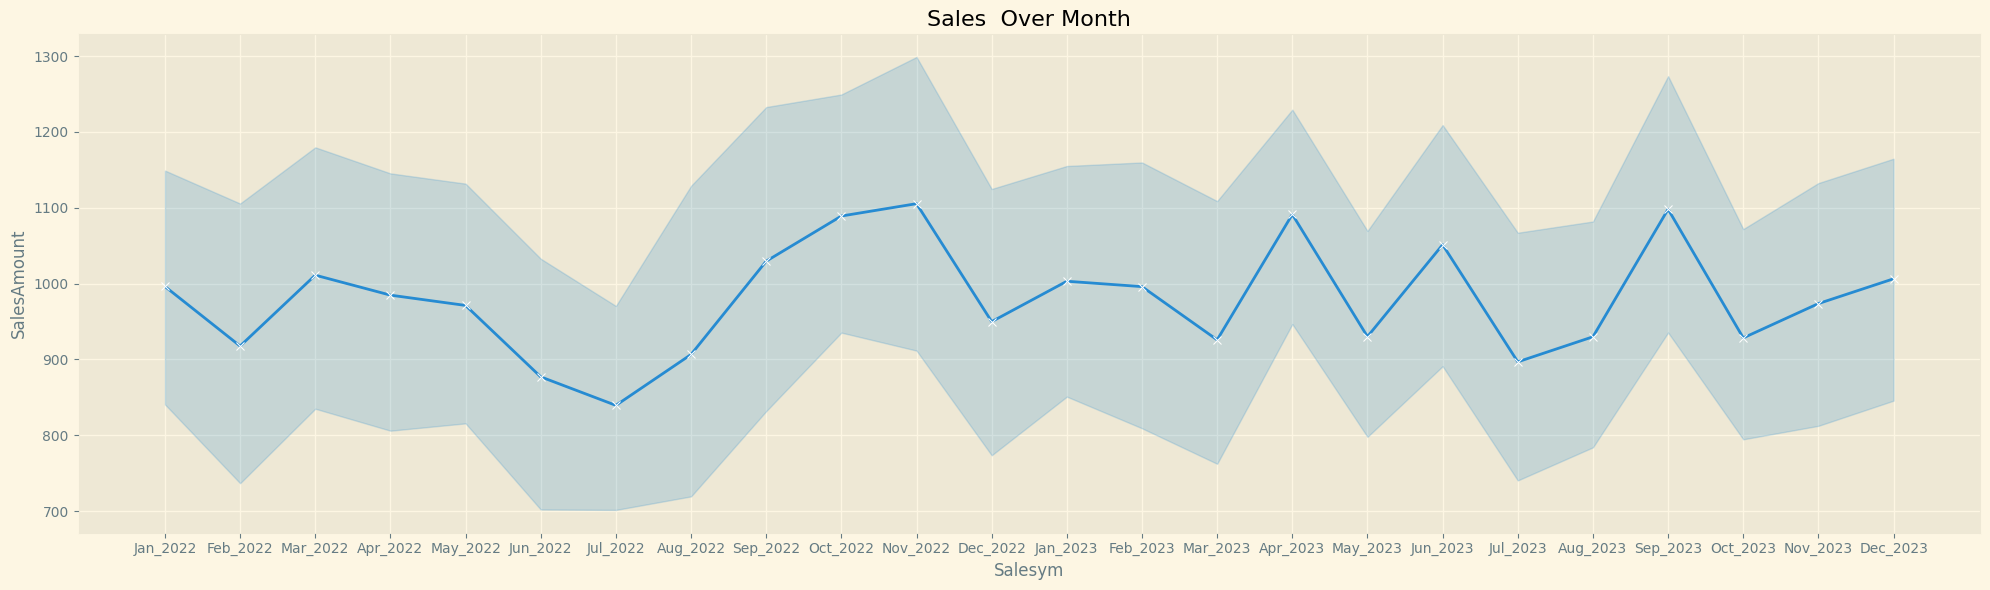

In [ ]:
# @title Sales  Over Month
plt.figure(figsize=(20, 6))
sns.lineplot(x='Salesym', y='SalesAmount', data=df, marker='x')
plt.title('Sales  Over Month')
plt.tight_layout()
plt.show()

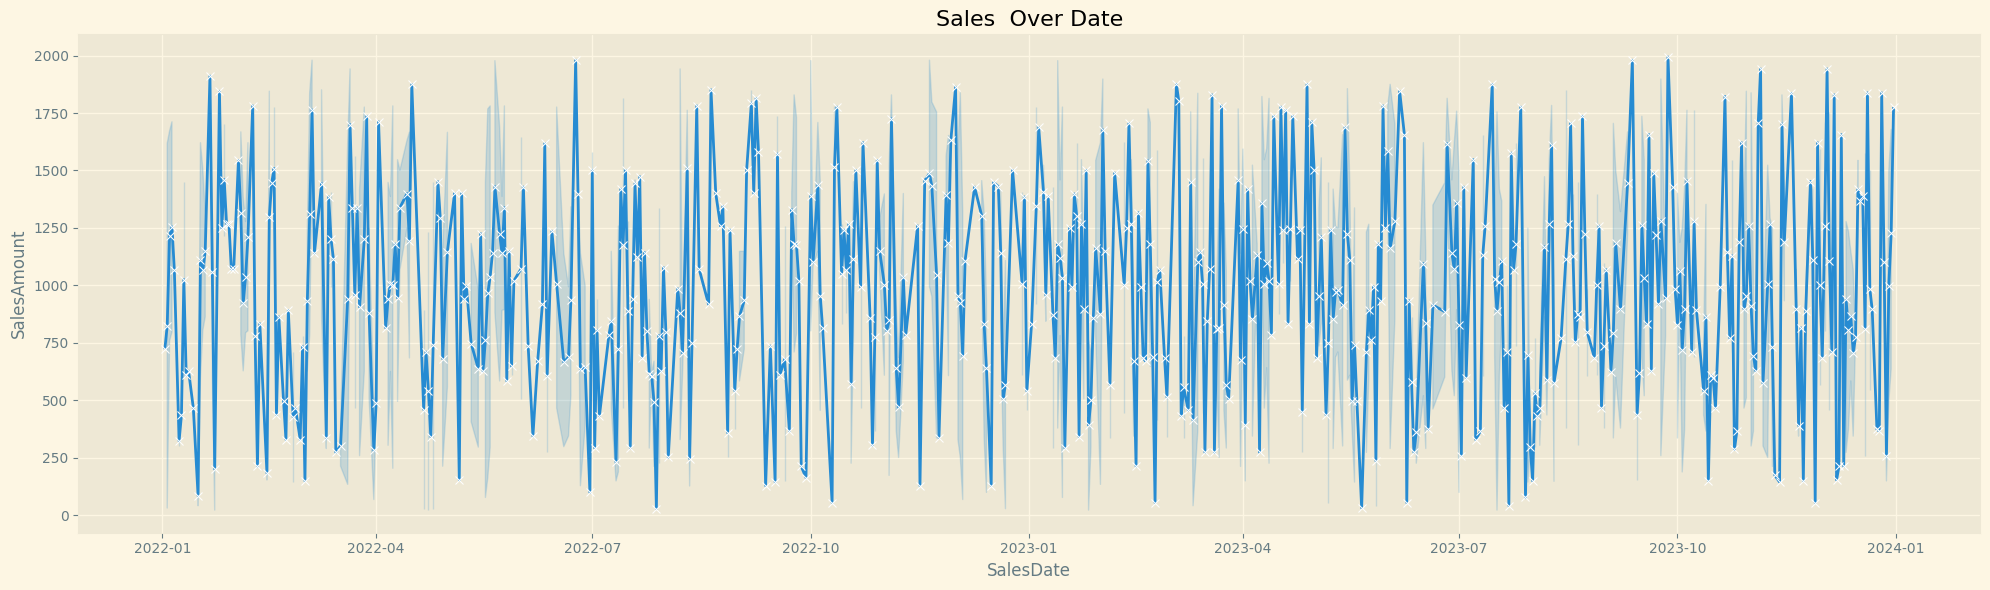

In [ ]:
# @title Sales  Over Dates
plt.figure(figsize=(20, 6))
sns.lineplot(x='SalesDate', y='SalesAmount', data=df, marker='x')
plt.title('Sales  Over Date')
plt.tight_layout()
plt.show()

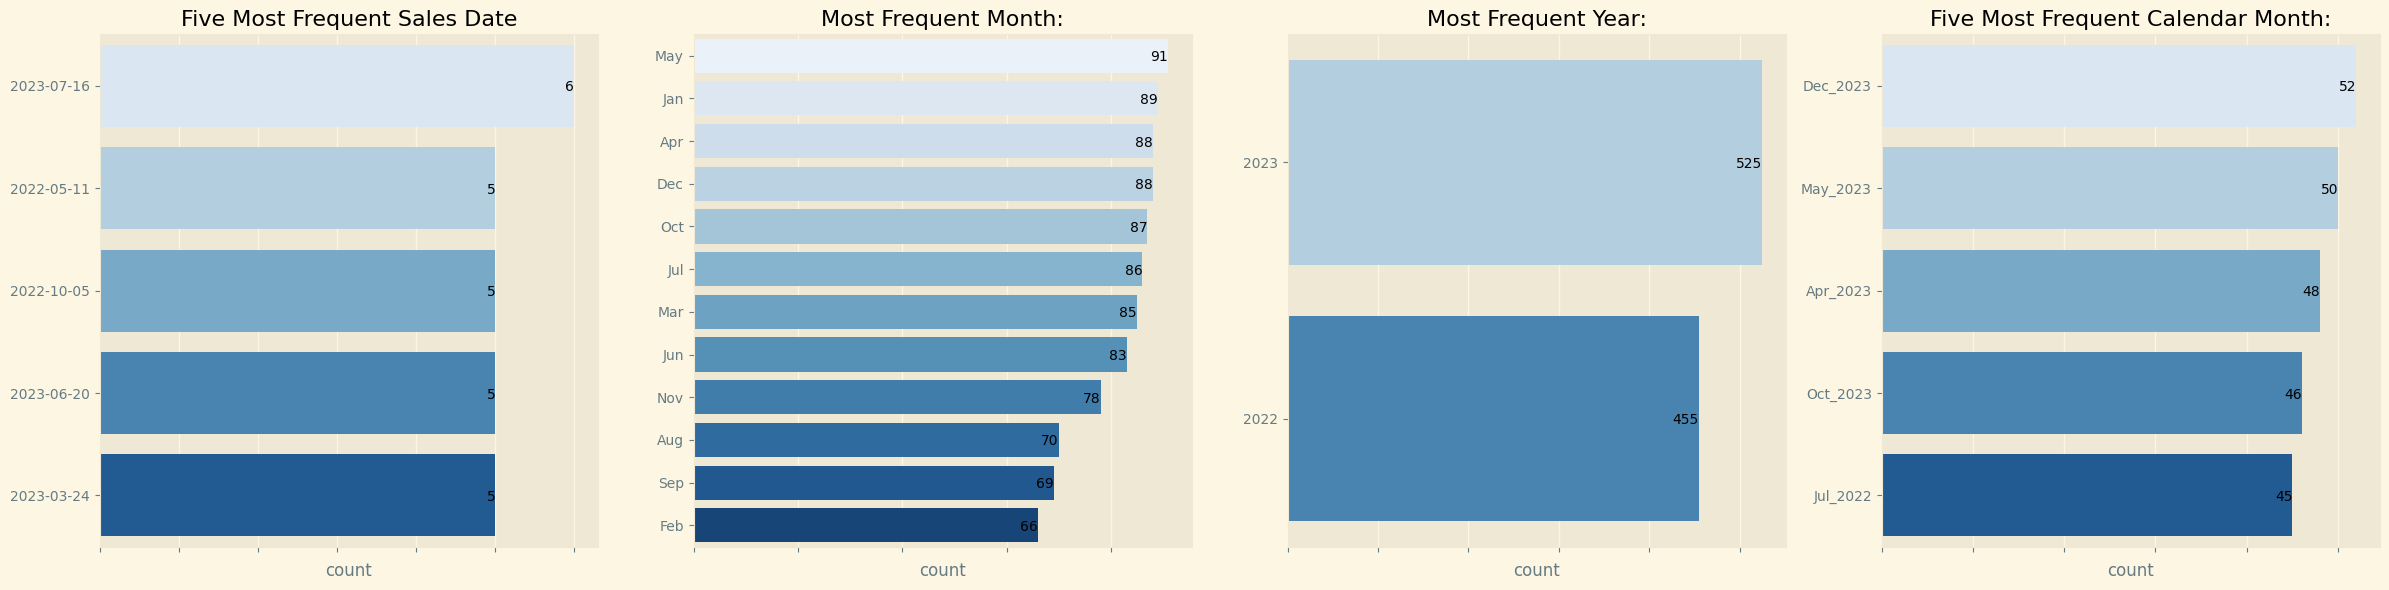

In [ ]:
# @title Most Frequent

fig, axes = plt.subplots(1, 4,sharey=False,sharex=False,figsize=(24,6))  # Adjust figsize for layout


#for the 4 columns with date date will calculate the value_counts, plot the results and anotate the bars with the counts to show more information in our plot

#frequent DATE
most_freq_date= df["SalesDate"].value_counts().reset_index()

ax1 = sns.barplot(ax=axes[0],y="SalesDate",x="count",data=most_freq_date.head(5),palette="Blues")
ax1.set_title("Five Most Frequent Sales Date")
annotate_bars(ax1)

#Frequent YEAR
most_freq_year= df["SalesYear"].value_counts().reset_index()

ax2 = sns.barplot(ax=axes[2],y="SalesYear",x="count",data=most_freq_year,order=("2023","2022"),palette="Blues")
ax2.set_title("Most Frequent Year:")
annotate_bars(ax2)

#Frequent MONTH
most_freq_month= df["SalesMonth"].value_counts().reset_index()

ax3 = sns.barplot(ax=axes[1],y="SalesMonth",x="count",data=most_freq_month,palette="Blues",order= most_freq_month.sort_values(by='count', ascending=False)[most_freq_month.columns[0]])
annotate_bars(ax3)
ax3.set_title("Most Frequent Month:")

#Frequent CAL MONTH
most_freq_cmonth= df["Salesym"].value_counts().reset_index()

ax4 = sns.barplot(ax=axes[3],y="Salesym",x="count",data=most_freq_cmonth.head(5),palette="Blues")
annotate_bars(ax4)

ax4.set_title("Five Most Frequent Calendar Month:")



plt.tight_layout()
plt.show()




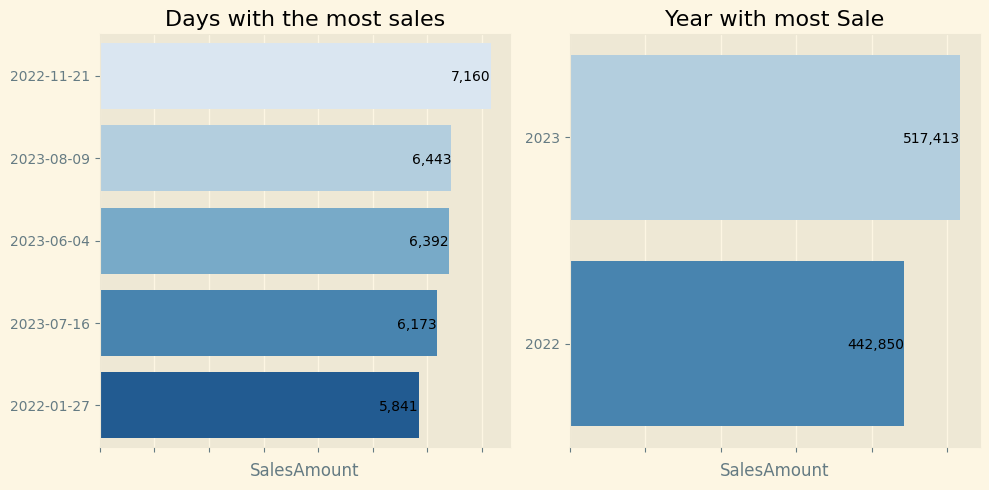

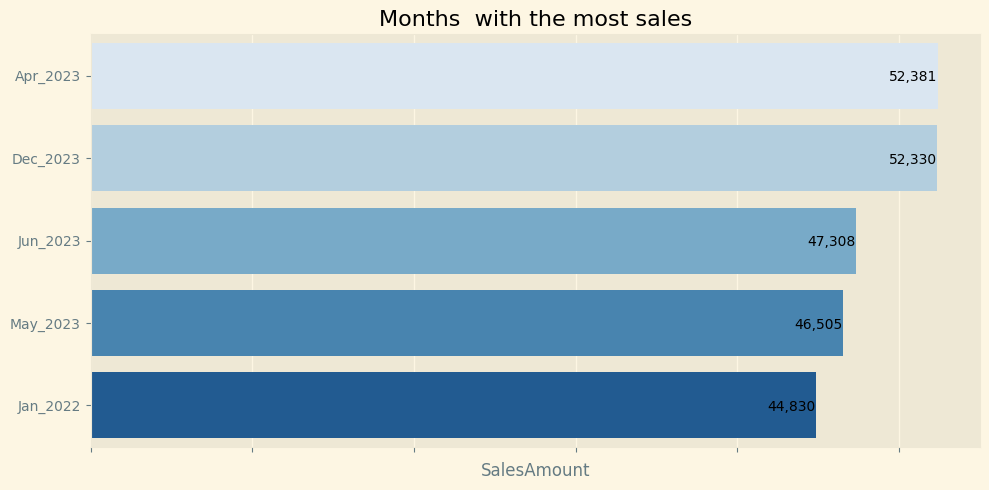

Least sales day:


,546
SalesDate,2022-07-28 00:00:00
SalesAmount,28


In [ ]:
# @title Most Sales
fig, axes = plt.subplots(1, 2,sharey=False,sharex=False,figsize=(10,5))  # Adjust figsize for layout


#As in previous section now will calculate the sum sales of each value in our columns
#for year column we also annotate the percentage of sales for more information in our plot

#BEST DATE
best_sales_date = df.groupby(df['SalesDate'])['SalesAmount'].sum().sort_values(ascending=False).reset_index()

ax1 =  sns.barplot(ax=axes[0],y="SalesDate",x="SalesAmount",data=best_sales_date.head(5),palette="Blues")
ax1.set_title("Days with the most sales")
annotate_bars(ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


#BEST YEAR
best_year = df.groupby(df['SalesYear'])['SalesAmount'].sum().sort_values(ascending=False).reset_index()
total_sales = df['SalesAmount'].sum()
best_year['Percentage'] = (best_year['SalesAmount'] / total_sales) * 100

ax3 = sns.barplot(ax=axes[1],y="SalesYear",x="SalesAmount",data=best_year,order=(2023,2022),palette="Blues" )
ax3.set_title("Year with most Sale")
annotate_bars(ax3)
plt.tight_layout()



#Best CALENDAR MONTH
best_month = df.groupby(df['Salesym'])['SalesAmount'].sum().sort_values(ascending=False).reset_index()


plt.figure(figsize=(10,5))
ax2 = sns.barplot(y="Salesym",x="SalesAmount",data=best_month.head(5),palette="Blues")
ax2.set_title("Months  with the most sales")
annotate_bars(ax2)

plt.tight_layout()
plt.show()


#----#
print("Least sales day:")
display(best_sales_date.tail(1).T)

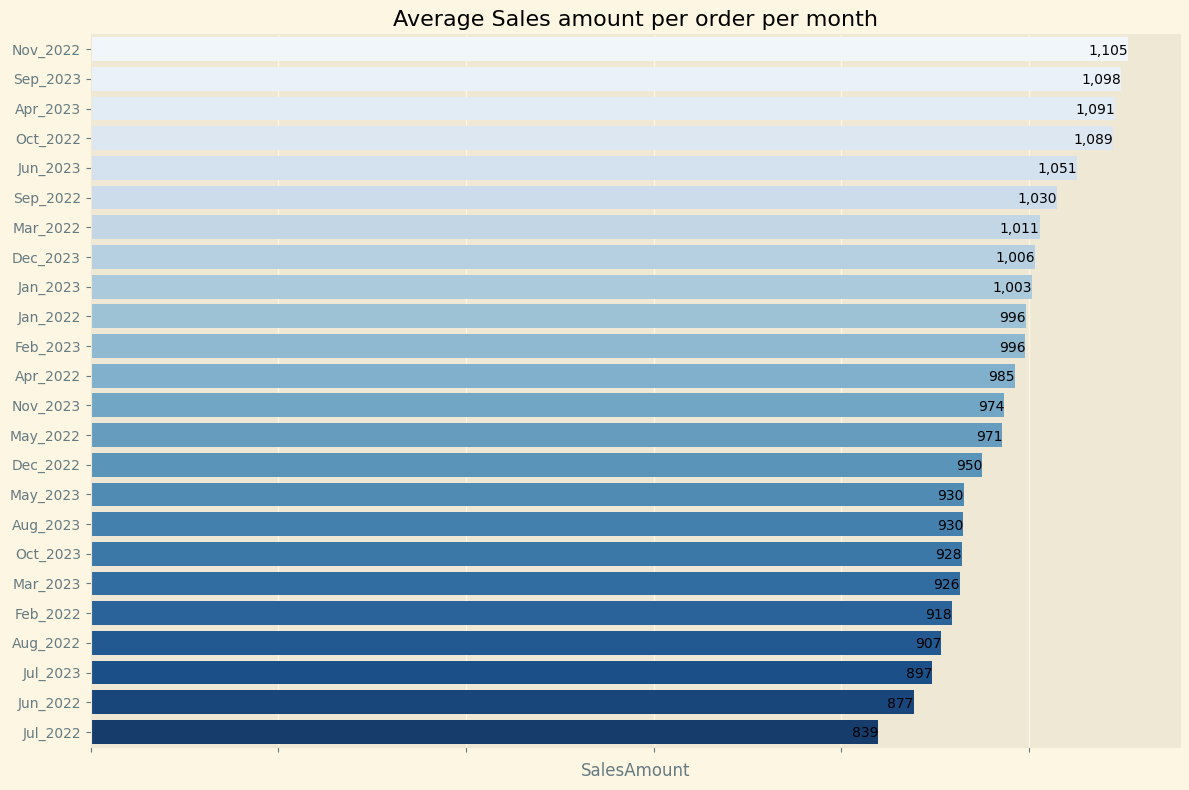

In [ ]:
# @title Average sales amount per order (980$) Best average order Month (November of 2022)
avg_sales_per_month = df.groupby('Salesym')['SalesAmount'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
plot_09 = sns.barplot(y="Salesym",x="SalesAmount",data=avg_sales_per_month,palette="Blues")

annotate_bars(plot_09)
plt.title("Average Sales amount per order per month")
plt.tight_layout()
plt.show()

##PRODUCTS
<p align = "justify"> Electronics are the most frequent category in our data, appearing 347 times and accounting for 35% of sales with 340,863 usd. However, the data and graphs suggest a relatively even distribution across categories despite Electronics leading. The other two categories are not far behind in numbers. This is further supported by the fact that the average sales amount of each category is almost equal.  </p>



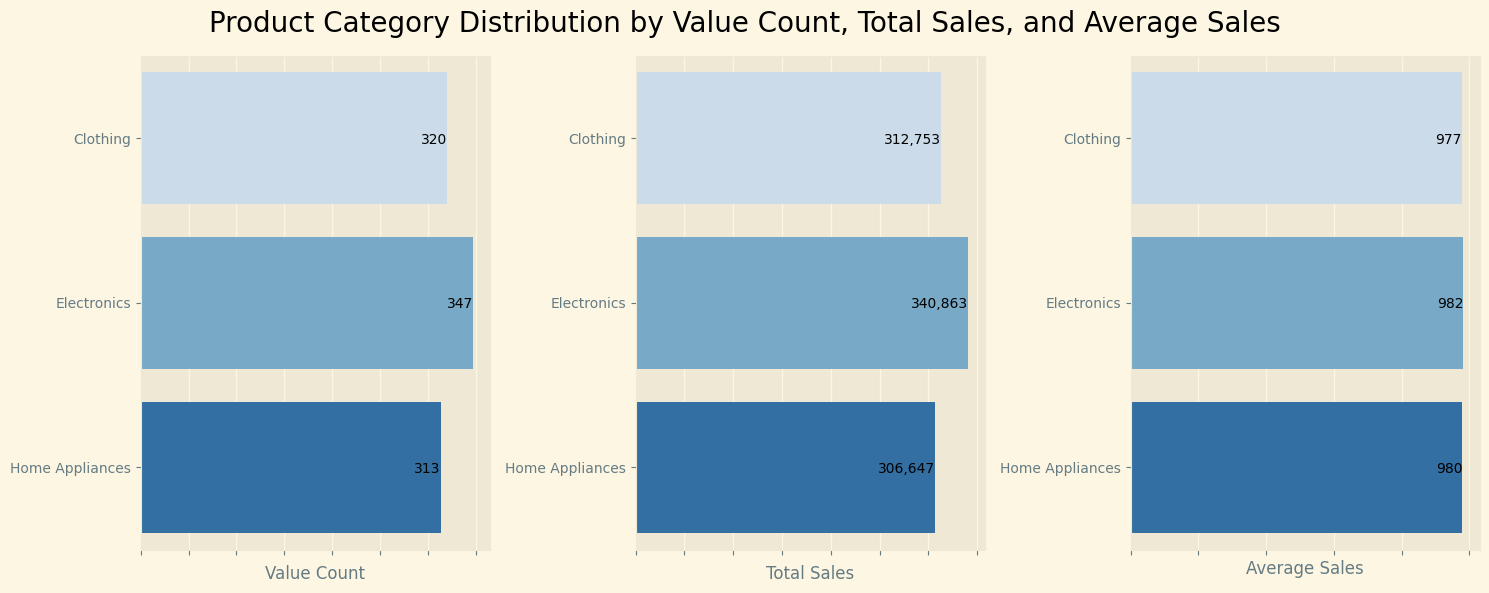

In [ ]:
# @title Product Category stats for Sales Amount and Graphs

#use the stats_and_graph function
stats_and_graphs(df,"ProductCategory","SalesAmount","Product Category")

## **AGE**

<p align = "justify">"Age in our data is a categorical variable with two distinct categories: 22, 35, The majority of customers are aged 22 (51%). The age group 22 has the highest total value (492,930), slightly higher than the age group 35 (467,333). The mean values for age groups 22 (976) and 35 (984) are very close, suggesting similar average behavior or spending patterns between these two groups."</p>



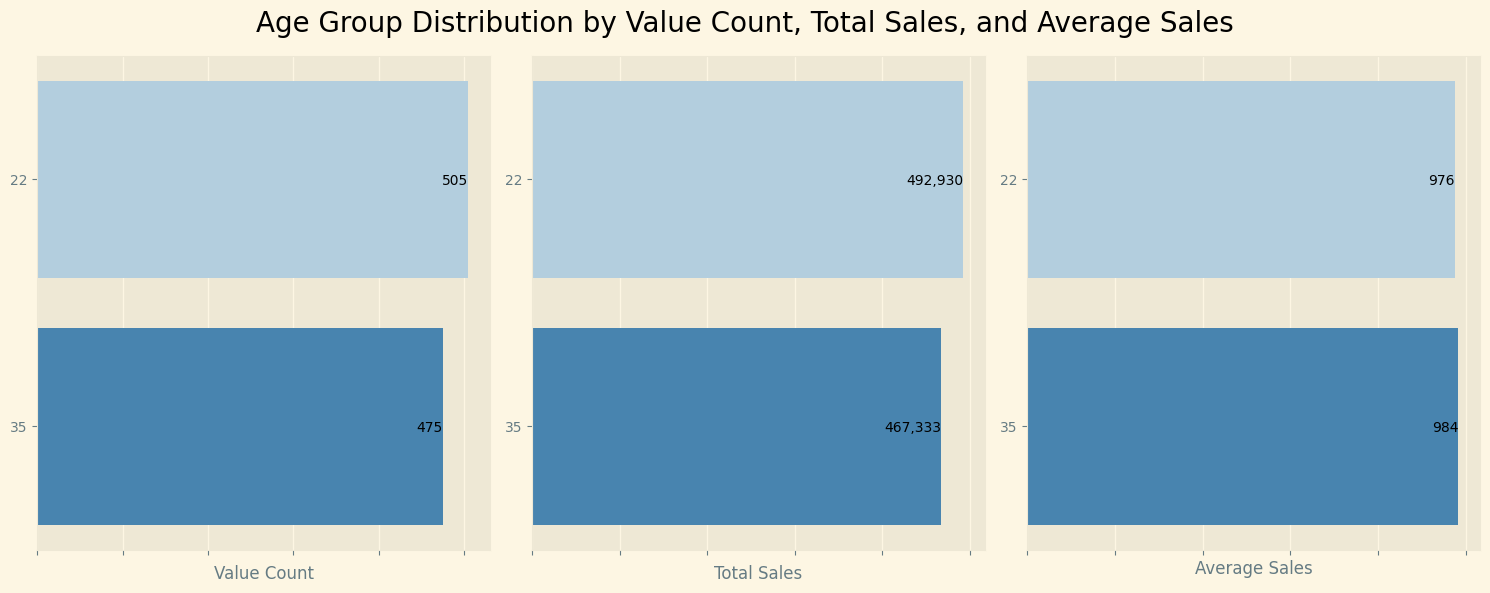

In [ ]:
# @title Age  stats for Sales Amount and Graphs
#use the stats_and_graph function
stats_and_graphs(df,"CustomerAge","SalesAmount", "Age Group")

## **GENDER**

<p align = "justify"> Our customer base is primarily male  and female (~97%) , with a small portion not disclosing their gender. Males tend to spend the most on average (993), with a total οf 472,699. Females follow closely with a similar spending pattern.</p>

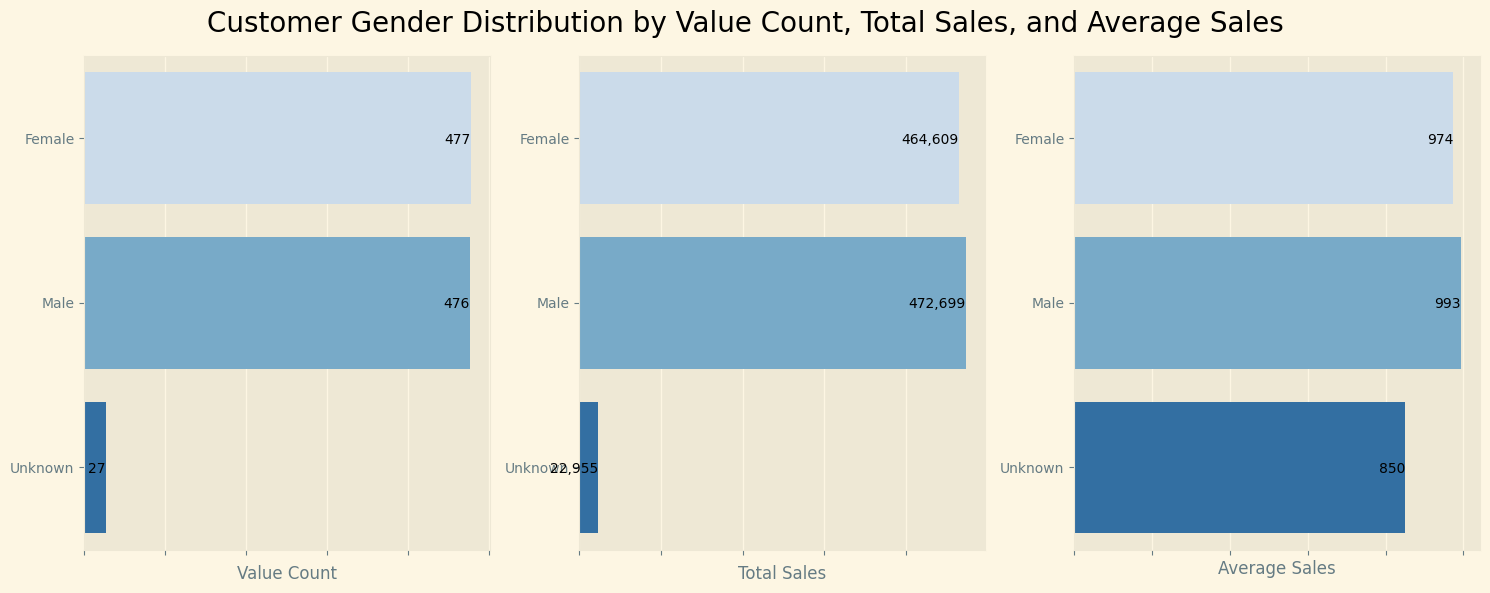

In [ ]:
#@title Customer Gender stats for Sales Amount and Graphs
#use the stats_and_graph function
stats_and_graphs(df,"CustomerGender","SalesAmount","Customer Gender")

##**LOCATION**
<p align = "justify">The United States (USA) leads in the number of appearances within our data, with 205 occurrences. However, the United Kingdom (UK) takes the top spot for sales, holding roughly 21%, slightly exceeding the USA. Canada and India follow closely behind, each contributing around 19% of sales. Australia and Japan exhibit the least sales, hovering around 10%, which aligns with their lower frequency of appearance in the dataset. </p>


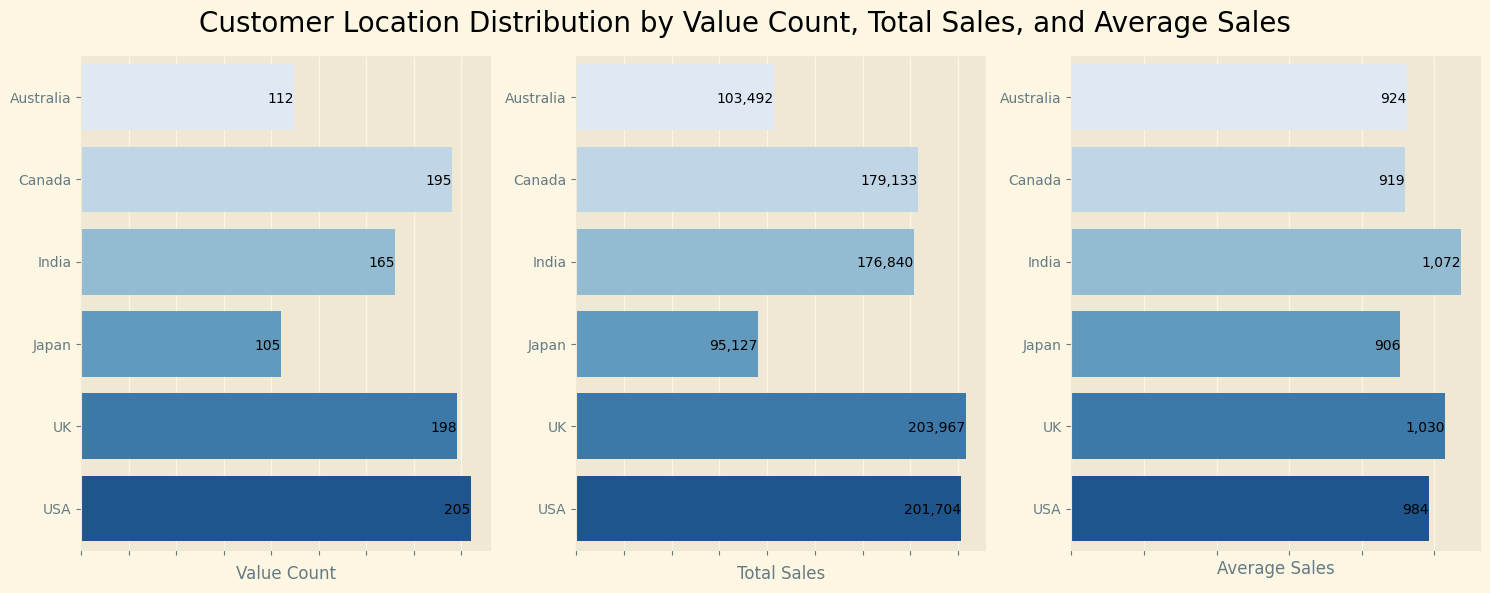

In [ ]:
#@title Customer Location stats for Sales Amount and Graphs
#use the stats_and_graph function
stats_and_graphs(df,"CustomerLocation","SalesAmount","Customer Location")

## **RATING**

<p align = "justify"> Products rated 2 and 3 have the highest sales volume and appears the most times or our data. This might suggest potential issues with these products, leading to lower customer satisfaction.  

Based on distribution which looks even , we can prioritize efforts to boost lower-rated products and market higher-rated ones.</p>

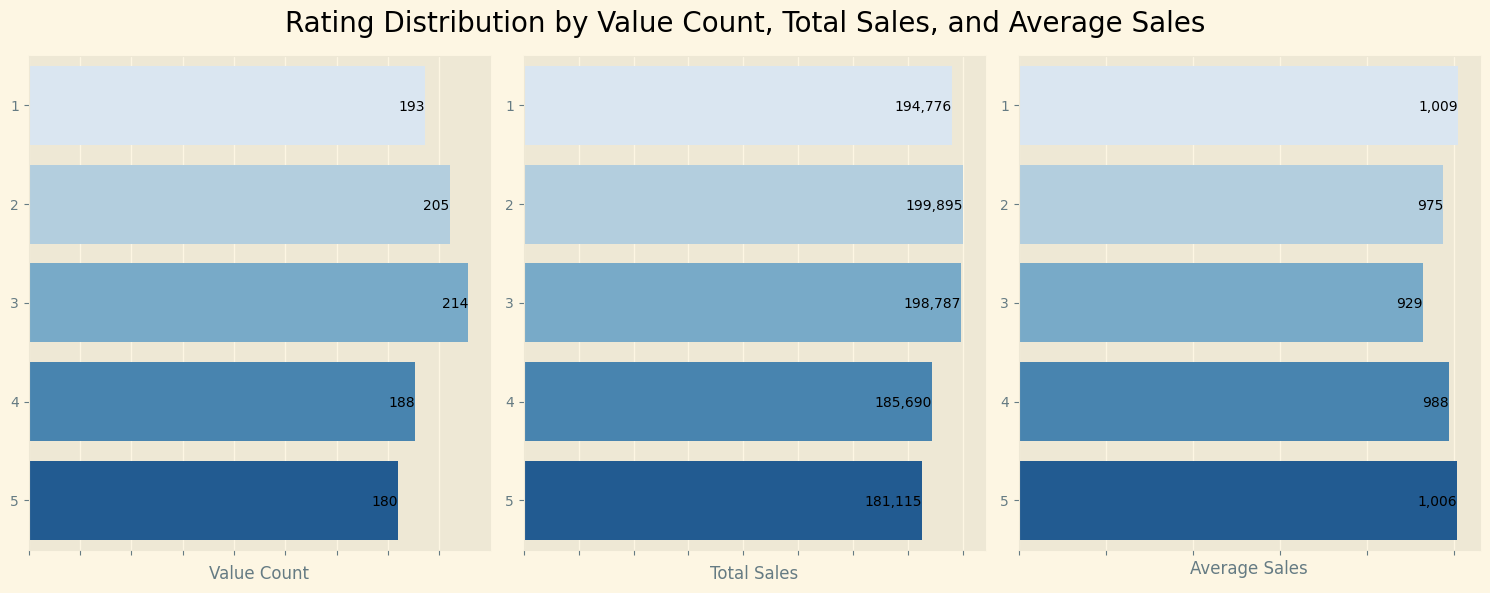

In [ ]:
#@title Rating stats for Sales Amount and Graphs
#use the stats_and_graph function
df["ProductRatings"] = df["ProductRatings"].astype(str)

stats_and_graphs(df,"ProductRatings","SalesAmount","Rating")

# **Hypothesis Testing**

In our hypothesis testing we will use the ANOVA for our independet variables with three or more levels (categories or groups). Anova it's designes to compare the means of these multiple groups. For the CustomerAge column will perfom a two-way T test as it has only two categories.


For the Product Category, Customer Gender and Product Ratings the ANOVA statistic  value is small and lower than the critical F value, this suggests that there is not significant difference between the SalesAmount means of the categories. Additionaly the p value is higher than the value of the significance level (alpha=0.05). That means that we **failed to  reject the null hypothesis that  this categories has no effect on average Sales Amount**.

The combination of the two results suggests that the group means are very similar to each other and any observed differences in group means are likely due to randomness rather than a true effect and is not statistically significant. We got the same conlusion for the Customer Age feature after perfoming two-sample t-test

The Customer Location ANOVA test shows F statistic value higher than the critical F value(2.223) this suggests that there is some varation between the sales means of the six locations. Also the p-Value (0.031) is lower than the value of the significance level (alpha=0.05). We gonna reject the Null Hypothesis.

Based on the F statistic and p-value, we conclude that there is a statistically significant difference between the means of some groups. That means that the observed variation bettween the sales means of the six locations is unlikely due to randomness and that there is an affect of Customer Location to average Sales Amount

 To further explore this connection, we will perform a two-way ANOVA test.

A two-way ANOVA allows us to examine how the interaction between two independent variables affects a dependent variable. Unfortunatly no combination of features scored a P-Value greater than 0.05. The three combinations that have a score lower than 0.10 are

* CustomerAge and ProductRatings pr(>f) result:	 0.099
* ProductCategory and CustomerLocation pr(>f) result:	 0.077
* ProductRatings and CustomerLocation pr(>f) result:	 0.086

The combination with the lowest score, Product Category and Customer Locations,will be analyzed more in a later section to see how those features jointly influnce sales




  


In [ ]:
# @title function for one  way anova test
df_anova = df[["SalesAmount","CustomerAge","ProductCategory","CustomerGender","CustomerLocation","ProductRatings"]]


'''
 the functions takes as entry the df
and gives as an outpout a df with the anova results, the degrees between and within, the critical f value, the F-statistic and the p-value
'''

def anova1(df):
  alpha = 0.05
  anova_results = pd.DataFrame(columns=['Feature',"degrees_between","degrees_within","critical_f",'F-statistic', 'p-value'])


  for cola in df.columns:

    if cola != 'SalesAmount':

      #degree of freedom and critical_f
      k= df[cola].nunique()
      N= df[cola].count()
      degrees_between = k-1
      degrees_within = N-k
      critical_f = f.ppf(1 - alpha, degrees_between,degrees_within)

      # Perform ANOVA test
      unique_values = df[cola].unique()

      sales_group  = [] # Create a list to store sales data for each unique value

      #for ever value in column add the values of salesAmount in sales_group
      for uni in unique_values:
        res = df_anova[df[cola] == uni]['SalesAmount']
        sales_group.append(res)


     # Perform ANOVA test
      result = f_oneway(*sales_group)

      #store the results in a dataframe
      df_temp = pd.DataFrame({'Feature': [cola],"degrees_between": [degrees_between],"degrees_within": [degrees_within],"critical_f": [critical_f], 'F-statistic': [result.statistic], 'p-value': [result.pvalue]})
      anova_results = pd.concat([anova_results, df_temp], ignore_index=True)

      print(f'{cola}')
      if result.pvalue < alpha:
        print(f"Result: Reject the null hypothesis that {cola} has no effect on average Sales Amount")
        print('-----------------------------------------------------------------------------------------------\n')
      else:
       print(f"Result: Fail to reject the null hypothesis that {cola} has no effect on average Sales Amount")
       print('------------------------------------------------------------------------------------------------\n')

  #print the results
  display(anova_results)

In [ ]:
# @title  an independent-samples t-test for Customer Age


# Separate sales data by gender
young = df[df['CustomerAge'] == "22"]['SalesAmount']
elder = df[df['CustomerAge'] == "35"]['SalesAmount']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(young, elder)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

print(
'''P-value: is higher than 0.05, indicating that there is no significant
difference in sales between 22aged and 35aged customers
We fail to reject the null hypothesis.''')

T-statistic: -0.22543832229030533
P-value: 0.8216854001925228
P-value: is higher than 0.05, indicating that there is no significant
difference in sales between 22aged and 35aged customers
We fail to reject the null hypothesis.


In [ ]:
# @title perform One-way ANOVA
pd.options.display.float_format = '{:.3f}'.format #change the display format of float number for better percentation
anova1(df_anova)

CustomerAge
Result: Fail to reject the null hypothesis that CustomerAge has no effect on average Sales Amount
------------------------------------------------------------------------------------------------

ProductCategory
Result: Fail to reject the null hypothesis that ProductCategory has no effect on average Sales Amount
------------------------------------------------------------------------------------------------

CustomerGender
Result: Fail to reject the null hypothesis that CustomerGender has no effect on average Sales Amount
------------------------------------------------------------------------------------------------

CustomerLocation
Result: Reject the null hypothesis that CustomerLocation has no effect on average Sales Amount
-----------------------------------------------------------------------------------------------

ProductRatings
Result: Fail to reject the null hypothesis that ProductRatings has no effect on average Sales Amount
-------------------------------------

,Feature,degrees_between,degrees_within,critical_f,F-statistic,p-value
0,CustomerAge,1,978,3.851,0.051,0.822
1,ProductCategory,2,977,3.005,0.007,0.993
2,CustomerGender,2,977,3.005,0.955,0.385
3,CustomerLocation,5,974,2.223,2.469,0.031
4,ProductRatings,4,975,2.381,0.744,0.562


In [ ]:
# @title perform two way ANOVA
featurez=["CustomerAge","ProductCategory","CustomerGender","ProductRatings","CustomerLocation"] #list for featurez so we can perfome the for loop

#double loop to select all the two feature combinations
for i in range(len(featurez)):
  for j in range(i + 1, len(featurez)):
    feat1 = featurez[i]
    feat2 = featurez[j]

    model = ols(f'SalesAmount ~ C({feat1}) + C({feat2}) + C({feat1}):C({feat2})',data=df_anova ).fit() #run the anova test
    result = pd.DataFrame(sm.stats.anova_lm(model, type=2)) #store the results in a dataframe

    print(f'{featurez[i]} and {featurez[j]} pr(>f) result:\t {round(result.iloc[2]["PR(>F)"],3)}') #print only the pr>f result


CustomerAge and ProductCategory pr(>f) result:	 0.406
CustomerAge and CustomerGender pr(>f) result:	 0.742
CustomerAge and ProductRatings pr(>f) result:	 0.099
CustomerAge and CustomerLocation pr(>f) result:	 0.302
ProductCategory and CustomerGender pr(>f) result:	 0.189
ProductCategory and ProductRatings pr(>f) result:	 0.132
ProductCategory and CustomerLocation pr(>f) result:	 0.077
CustomerGender and ProductRatings pr(>f) result:	 0.591
CustomerGender and CustomerLocation pr(>f) result:	 0.576
ProductRatings and CustomerLocation pr(>f) result:	 0.086


#**Predictive modeling:**

Our initial approach involved building a linear regression model for every possible combination of features. However, these models yielded very poor performance, with R-squared values falling below zero (around -0.20).

This performance likely stems from a lack of significant relationships between the independent variables and the dependent variable (Sales Amount). Hypothesis testing confirmed no noticeable difference in the mean of Sales Amount across different levels of the independent variables,except Customer Location. Additionally, correlations between categorical variables and Sales Amount were all very weak, all falling below 0.05 and none exceeding 0.08.

In essence, the linear regression models were unable to identify any linear relationships between Sales Amount and the other features. Consequently, the model predictions simply hovered around the average sales amount.




In [ ]:
# @title build new dataframe for the model
df_predict = df[["SalesAmount","ProductCategory","CustomerAge","CustomerGender","CustomerLocation","ProductRatings"]]

#turn categorical variables into dummies
df_predict_dum = pd.get_dummies(df_predict, columns=['ProductCategory', 'CustomerAge', 'CustomerGender',"CustomerLocation","ProductRatings"], drop_first=True)

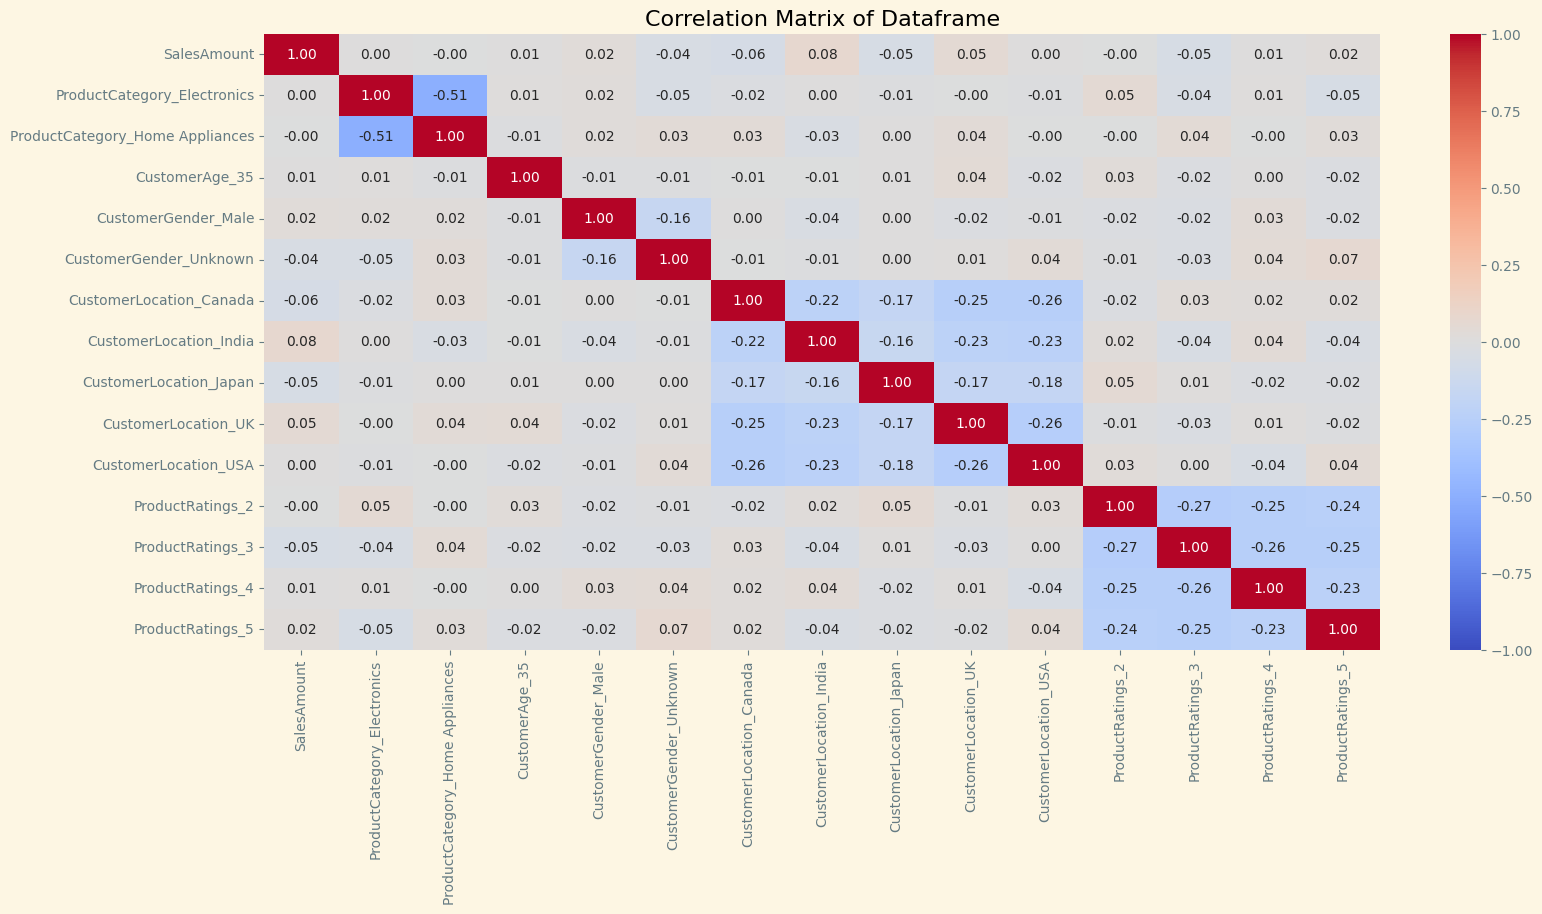

In [ ]:
# @title correlation matrix

correlation_matrix = df_predict_dum.corr()  #build the correlation matrix
plt.figure(figsize=(18,8))    #plot a figure fot the correlation matrix

sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Dataframe')
plt.show()

In [ ]:
# @title correlation for SalesAmount
row1=correlation_matrix.iloc[0]
print(row1[1:])

ProductCategory_Electronics        0.003
ProductCategory_Home Appliances   -0.000
CustomerAge_35                     0.007
CustomerGender_Male                0.024
CustomerGender_Unknown            -0.041
CustomerLocation_Canada           -0.057
CustomerLocation_India             0.077
CustomerLocation_Japan            -0.048
CustomerLocation_UK                0.047
CustomerLocation_USA               0.004
ProductRatings_2                  -0.005
ProductRatings_3                  -0.050
ProductRatings_4                   0.007
ProductRatings_5                   0.023
Name: SalesAmount, dtype: float64


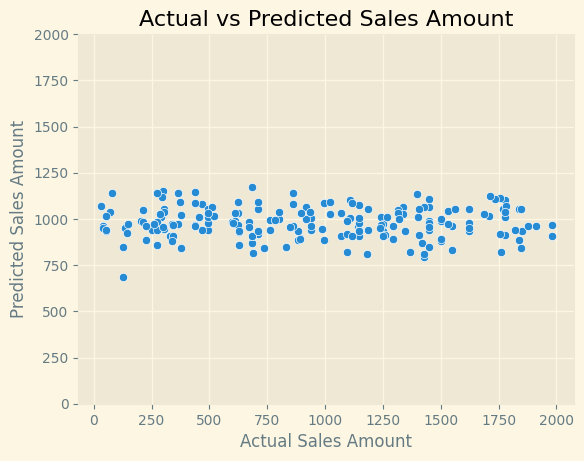

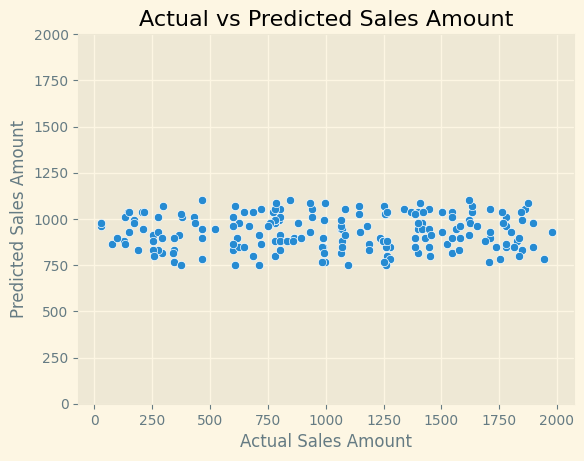

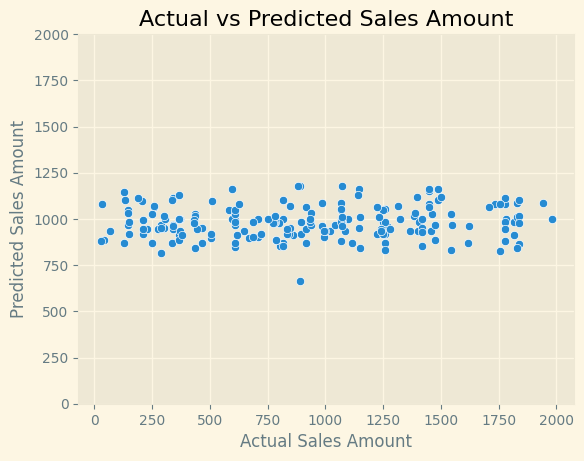

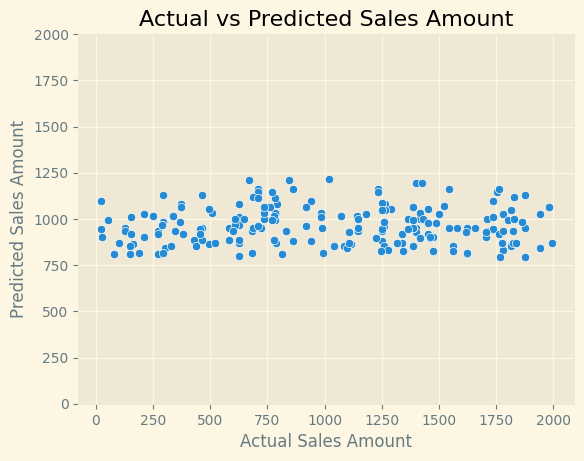

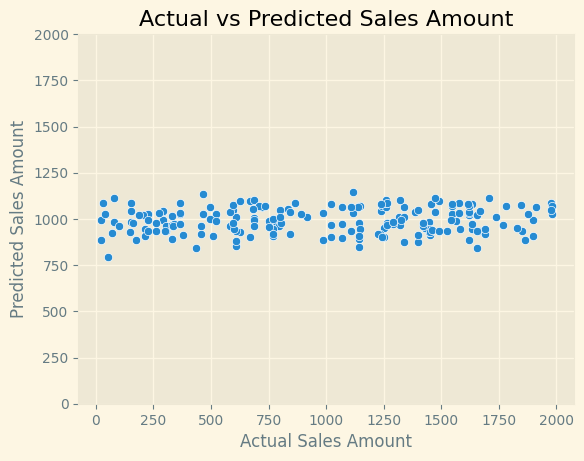

Scores per fold:


,score,R2,intercept,mean_squared_error,root_mse
0,-0.034,-0.034,-7268340698857544.000,296457.694,544.479
1,-0.061,-0.061,-114374960119728464.000,300461.980,548.144
2,-0.014,-0.014,38069251085644776.000,265216.903,514.992
3,-0.036,-0.036,63130797923066136.000,310674.311,557.382
4,0.009,0.009,-35452847390272288.000,304129.577,551.479



Mean scores:


,score,R2,intercept,mean_squared_error,root_mse
0,-0.027,-0.027,-11179219840029480.000,295388.093,543.295


In [ ]:
# @title first attempt linear regression for all features
df_predict_dum = pd.get_dummies(df_predict, columns=['ProductCategory', 'CustomerAge', 'CustomerGender',"CustomerLocation","ProductRatings"], drop_first=False)

#split the data on the depended variable and the features
y=df_predict_dum['SalesAmount']
X=df_predict_dum.drop(columns=['SalesAmount'])

#lists to store the scores per fold
score_list=[]
r2s_list=[]
MSE=[]
RMSE=[]
intercept_list=[]

#model for linear regression
model_lin = LinearRegression()

#set a Kfold method for 5 splits
cv = KFold(n_splits=5, random_state=42, shuffle=True)


#for loop to run the model with Kfold and store the all the metrics
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model_lin.fit(X_train, y_train)
    y_predict = model_lin.predict(X_test)

    #store scores
    score_list.append(model_lin.score(X_test, y_test))
    r2s_list.append(r2_score(y_true=y_test, y_pred=y_predict))
    MSE.append(mean_squared_error(y_true=y_test, y_pred=y_predict))
    RMSE.append(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_predict)))
    intercept_list.append(model_lin.intercept_)

    #plot
    sns.scatterplot(x=y_test, y=y_predict)
    plt.xlabel('Actual Sales Amount')
    plt.ylabel('Predicted Sales Amount')
    plt.ylim(0, 2000)
    plt.title('Actual vs Predicted Sales Amount')
    plt.show()



#made a dataframe of scores
comparison = pd.DataFrame({
    "score": score_list,
    "R2": r2s_list,
    "intercept": intercept_list,
    "mean_squared_error": MSE,
    "root_mse": RMSE,
    })

#print the scores and the mean of each score
print("Scores per fold:")
display(comparison)
print("\nMean scores:")
display(pd.DataFrame(comparison.mean(axis = 0)).T)

## all possible feature combinations for linear regression

In [ ]:
features = ['ProductCategory','CustomerAge','CustomerGender','CustomerLocation','ProductRatings']

# Generate and  all combinations of features
combinations_list=[]
for r in range(2, 6):
    combinations_temp = list(iter.combinations(features, r))  #for every r it will make all possible combinations of r features
    combinations_list.append(combinations_temp)  #store the combinations before moving into next r



fitz = [list(item) for sublist in combinations_list for item in sublist] #turn all combinations into one list so it will work in get_dummies for loop


In [ ]:
# @title linear regression X
df_predict_x=df[["SalesAmount",'ProductCategory','CustomerAge','CustomerGender','CustomerLocation','ProductRatings']]


y_x=df_predict_x['SalesAmount']

for fit in fitz:
  df_predict_dum_x = pd.get_dummies(df_predict_x[fit],dtype=int, drop_first=True)

#split the data on the depended variable and the features

  X_x=df_predict_dum_x

#lists to store the scores per fold
  score_list_x=[]
  r2s_list_x=[]
  MSE_x=[]
  RMSE_x=[]
  intercept_list_x=[]
  MAE_x=[]

#model for linear regression
  model_lin_x = LinearRegression()

#set a Kfold method for 5 splits
  cv_x = KFold(n_splits=5, random_state=42, shuffle=True)


#for loop to run the model with Kfold and store the all the metrics
  for train_index, test_index in cv_x.split(X_x):
      X_train_x, X_test_x, y_train_x, y_test_x = X_x.iloc[train_index], X_x.iloc[test_index], y_x.iloc[train_index], y_x.iloc[test_index]
      model_lin_x.fit(X_train_x, y_train_x)
      y_predict_x = model_lin_x.predict(X_test_x)

    #store scores
      score_list_x.append(model_lin_x.score(X_test_x, y_test_x))
      r2s_list_x.append(r2_score(y_true=y_test_x, y_pred=y_predict_x))
      MSE_x.append(mean_squared_error(y_true=y_test_x, y_pred=y_predict_x))
      RMSE_x.append(np.sqrt(mean_squared_error(y_true=y_test_x, y_pred=y_predict_x)))
      intercept_list_x.append(model_lin_x.intercept_)
      MAE_x.append(mean_absolute_error(y_true=y_test_x,y_pred=y_predict_x))

      #RUN THIS CODE IF YOU WANT ALL THE PLOTS FOR EVERY FOLD FOR EVERY COMBINATION
      #sns.scatterplot(x=y_test2, y=y_predict2)
      #plt.xlabel('Actual Sales Amount')
      #plt.ylabel('Predicted Sales Amount')
      #plt.ylim(0, 2000)
      #plt.title(fit)
      #plt.show()

  comparison_x=[]
#made a dataframe of scores
  comparison_x = pd.DataFrame({
    "score": score_list_x,
    "R2": r2s_list_x,
    "inte ": intercept_list_x,
    "mse": MSE_x,
    "r_mse": RMSE_x,
    "mae": MAE_x,
    })




  #print the scores and the mean of each score
  print(fit)
  display(pd.DataFrame(comparison_x.mean(axis = 0)).T)


['ProductCategory', 'CustomerAge']


,score,R2,inte,mse,r_mse,mae
0,-0.015,-0.015,973.788,291843.239,540.062,468.099


['ProductCategory', 'CustomerGender']


,score,R2,inte,mse,r_mse,mae
0,-0.019,-0.019,972.484,292803.968,540.968,468.955


['ProductCategory', 'CustomerLocation']


,score,R2,inte,mse,r_mse,mae
0,-0.013,-0.013,920.025,291398.278,539.633,467.334


['ProductCategory', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.019,-0.019,1006.060,292964.171,541.097,468.404


['CustomerAge', 'CustomerGender']


,score,R2,inte,mse,r_mse,mae
0,-0.017,-0.017,970.343,292467.982,540.657,469.054


['CustomerAge', 'CustomerLocation']


,score,R2,inte,mse,r_mse,mae
0,-0.012,-0.012,920.745,291043.857,539.309,467.389


['CustomerAge', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.018,-0.018,1006.033,292694.911,540.849,468.555


['CustomerGender', 'CustomerLocation']


,score,R2,inte,mse,r_mse,mae
0,-0.015,-0.015,909.302,291672.801,539.916,468.473


['CustomerGender', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.021,-0.021,1000.786,293657.960,541.746,469.540


['CustomerLocation', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.017,-0.017,947.973,292520.815,540.680,467.855


['ProductCategory', 'CustomerAge', 'CustomerGender']


,score,R2,inte,mse,r_mse,mae
0,-0.020,-0.020,968.987,293324.393,541.449,469.562


['ProductCategory', 'CustomerAge', 'CustomerLocation']


,score,R2,inte,mse,r_mse,mae
0,-0.015,-0.015,917.767,291934.784,540.134,467.947


['ProductCategory', 'CustomerAge', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.021,-0.021,1002.786,293540.400,541.631,469.096


['ProductCategory', 'CustomerGender', 'CustomerLocation']


,score,R2,inte,mse,r_mse,mae
0,-0.018,-0.018,907.361,292567.144,540.744,468.933


['ProductCategory', 'CustomerGender', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.025,-0.025,998.525,294541.431,542.561,470.132


['ProductCategory', 'CustomerLocation', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.021,-0.021,944.038,293402.075,541.495,468.277


['CustomerAge', 'CustomerGender', 'CustomerLocation']


,score,R2,inte,mse,r_mse,mae
0,-0.016,-0.016,906.943,292195.905,540.403,468.992


['CustomerAge', 'CustomerGender', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.023,-0.023,997.404,294235.484,542.279,470.230


['CustomerAge', 'CustomerLocation', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.019,-0.019,945.677,293108.173,541.228,468.412


['CustomerGender', 'CustomerLocation', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.022,-0.022,931.340,293706.996,541.796,469.349


['ProductCategory', 'CustomerAge', 'CustomerGender', 'CustomerLocation']


,score,R2,inte,mse,r_mse,mae
0,-0.020,-0.020,905.162,293089.947,541.230,469.503


['ProductCategory', 'CustomerAge', 'CustomerGender', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.027,-0.027,995.299,295111.461,543.087,470.789


['ProductCategory', 'CustomerAge', 'CustomerLocation', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.023,-0.023,941.878,293986.193,542.040,468.875


['ProductCategory', 'CustomerGender', 'CustomerLocation', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.025,-0.025,928.704,294614.053,542.633,469.823


['CustomerAge', 'CustomerGender', 'CustomerLocation', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.024,-0.024,929.122,294285.113,542.332,469.965


['ProductCategory', 'CustomerAge', 'CustomerGender', 'CustomerLocation', 'ProductRatings']


,score,R2,inte,mse,r_mse,mae
0,-0.027,-0.027,926.623,295189.720,543.167,470.439


-0.00037706390293212877
-0.00037706390293212877
286919.7087611216
535.6488670398936
932.7526881720428
462.12425933747073


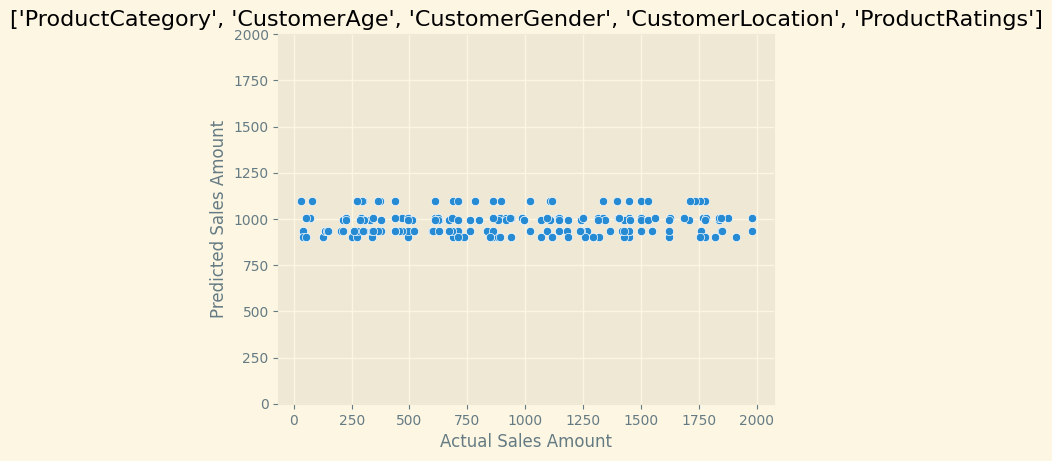

-0.04064216977427404
-0.04064216977427404
294684.4886463778
542.8484951129346
918.0106382978722
466.6567771712983


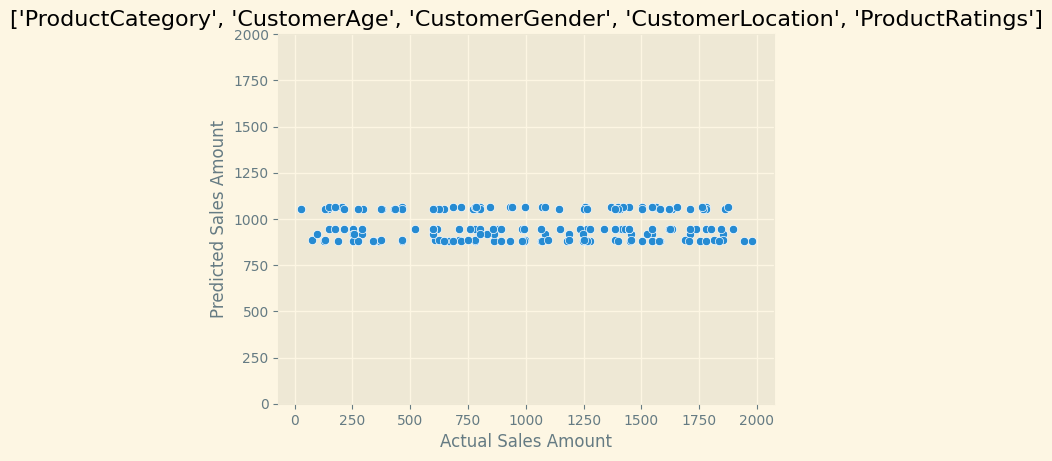

-0.008607445785779877
-0.008607445785779877
263700.399766295
513.5176723018352
919.0348837209299
431.74320430178994


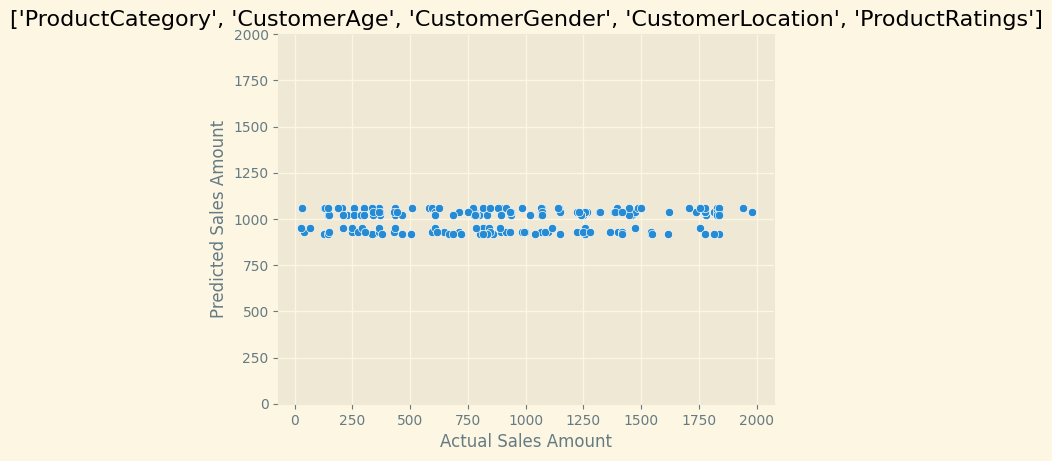

-0.01687850819678638
-0.01687850819678638
304824.8844609107
552.1094859363591
894.9382716049383
486.1932388588246


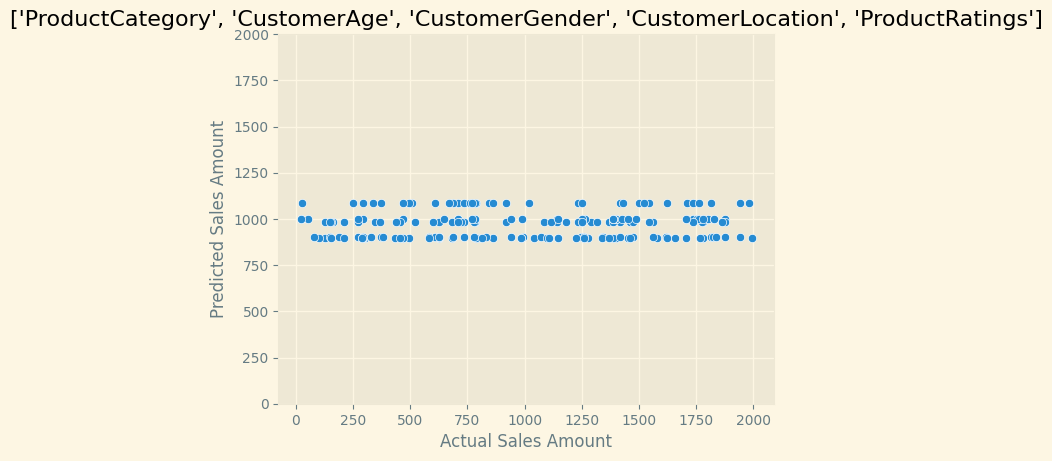

0.014663847447422551
0.014663847447422551
302405.11480752396
549.9137339688144
951.085106382979
487.39456837485784


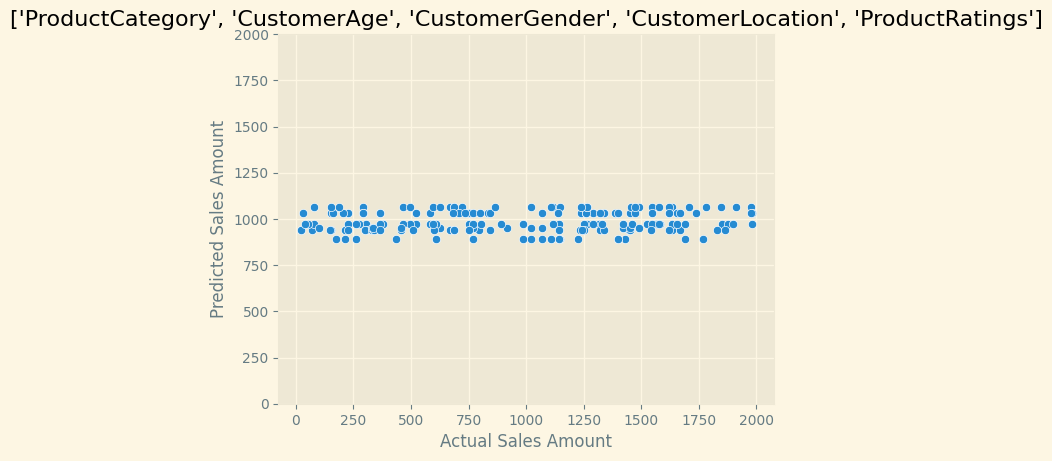

In [ ]:
y_2=df['SalesAmount']
X_2=  pd.get_dummies(df["CustomerLocation"],dtype=int, drop_first=True)

model_lin_2 = LinearRegression()

#set a Kfold method for 5 splits
cv_2 = KFold(n_splits=5, random_state=42, shuffle=True)


#for loop to run the model with Kfold and store the all the metrics
for train_index, test_index in cv_2.split(X_2):
  X_train_2, X_test_2, y_train_2, y_test_2 = X_2.iloc[train_index], X_2.iloc[test_index], y_2.iloc[train_index], y_2.iloc[test_index]
  model_lin_2.fit(X_train_2, y_train_2)
  y_predict_2 = model_lin_2.predict(X_test_2)


  print(model_lin_2.score(X_test_2, y_test_2))
  print(r2_score(y_true=y_test_2, y_pred=y_predict_2))
  print(mean_squared_error(y_true=y_test_2, y_pred=y_predict_2))
  print(np.sqrt(mean_squared_error(y_true=y_test_2, y_pred=y_predict_2)))
  print(model_lin_2.intercept_)
  print(mean_absolute_error(y_true=y_test_2,y_pred=y_predict_2))

      #RUN THIS CODE IF YOU WANT ALL THE PLOTS FOR EVERY FOLD FOR EVERY COMBINATION
  sns.scatterplot(x=y_test_2, y=y_predict_2)
  plt.xlabel('Actual Sales Amount')
  plt.ylabel('Predicted Sales Amount')
  plt.ylim(0, 2000)
  plt.title(fit)
  plt.show()


# **Statistical analysis of Customer Location and Product Category Grouped by Sales Amount**

**Customer Location and Product Category Grouped by Sales Amount**

Overall, the analysis reveals significant differences in purchasing behaviors across countries, making it challenging to identify a clear, universal pattern. Each country exhibits unique preferences and sales distributions:

**Australia**: Electronics dominates in Australia with 43% of total Sales Amount and Home Appliances, while having the fewest orders, boast the highest mean Sales Amount.

**Canada**: Place more orders on Home Appliances but achieves the highest Sales Amount in Electronics, which also has the highest average Sales Amount.

**India**: Prefers Clothing, which has the highest Sales Amount percentage and average Sales Amount, with all categories averaging over 1000 in Sales Amount.

**Japan**: Represents a smaller market with equal distribution of orders but lower sales in Clothing, reflected in the lowest mean Sales Amount.

**UK**: Has the highest total Sales Amount in total, with Clothing showing the highest mean Sales Amount despite fewer orders, and Home Appliances outperforming Electronics in mean Sales Amount and percentage of Sales Amount

**USA**: Shows a preference for Clothing in sales percentage, although more orders are placed for Electronics, with Home Appliances lagging in all metrics.

In summary, while there are notable differences in how each country behaves in terms of product category preferences and sales distributions, the unique characteristics of each market prevent the identification of a clear overall pattern on Sales Amount

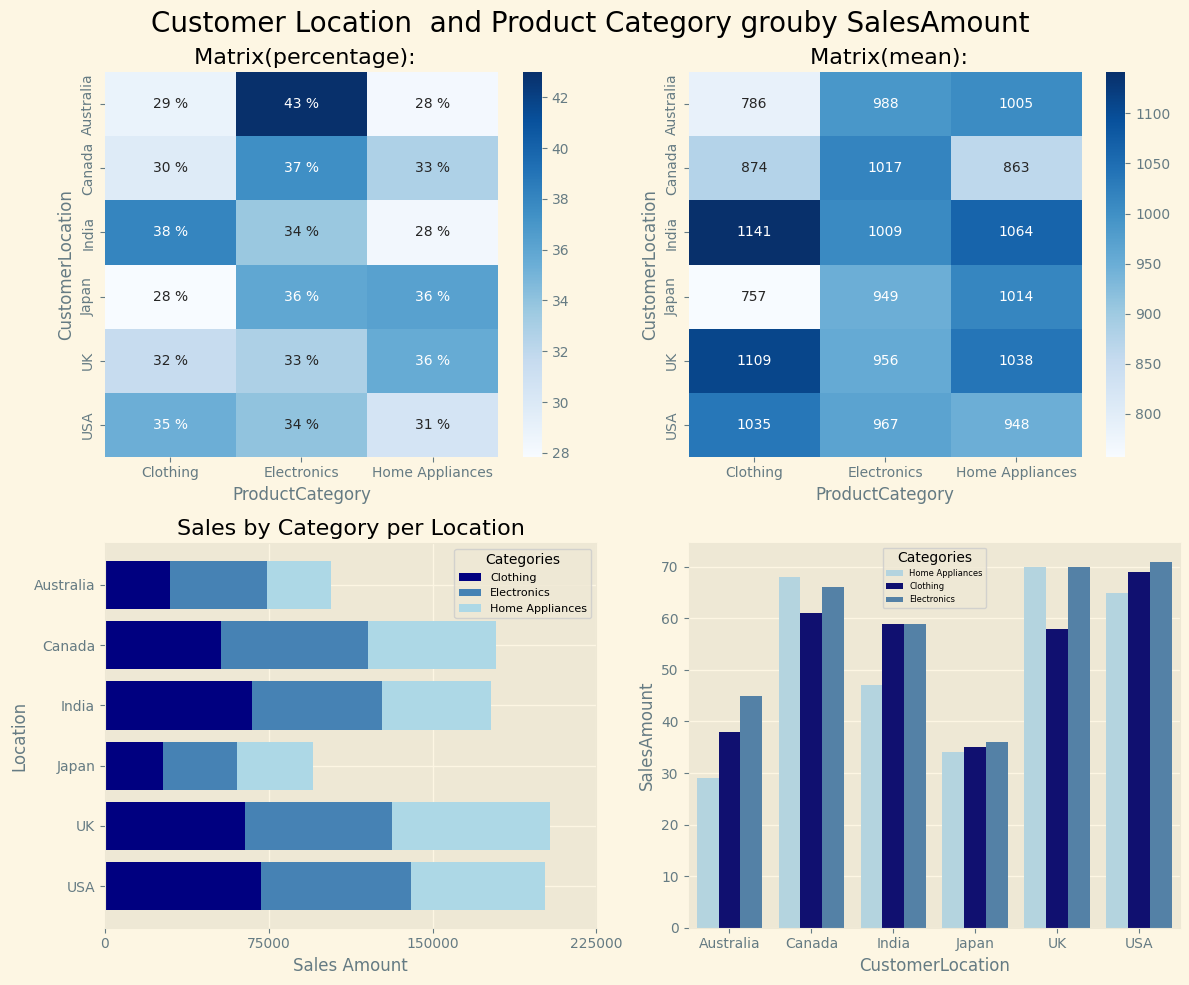

sum     mean  count  Percentage
CustomerLocation ProductCategory                                   
Australia        Clothing         29858  785.737     38      28.851
                 Electronics      44481  988.467     45      42.980
                 Home Appliances  29153 1005.276     29      28.169
Canada           Clothing         53342  874.459     61      29.778
                 Electronics      67101 1016.682     66      37.459
                 Home Appliances  58690  863.088     68      32.763
India            Clothing         67324 1141.085     59      38.071
                 Electronics      59513 1008.695     59      33.654
                 Home Appliances  50003 1063.894     47      28.276
Japan            Clothing         26493  756.943     35      27.850
                 Electronics      34155  948.750     36      35.905
                 Home Appliances  34479 1014.088     34      36.245
UK               Clothing         64328 1109.103     58      31.538
                 Electronics      66951  956.443     70      32.824
                 Home Appliances  72688 1038.400     70      35.637
USA              Clothing         71408 1034.899     69      35.402
                 Electronics      68662  967.070     71      34.041
                 Home Appliances  61634  948.215     65      30.557

In [ ]:
# @title code for plotting
#make a new dataframe with groupby of selected features for sum, mean, count and add a column for percentage
combination = df.groupby(["CustomerLocation","ProductCategory"])['SalesAmount'].agg(['sum','mean','count']).sort_values(by=['sum']).reset_index()
total_sales = df.groupby("CustomerLocation")['SalesAmount'].sum().reset_index()
total_sales.columns = ["CustomerLocation", 'total_sales']
combination = combination.merge(total_sales, on="CustomerLocation")

combination['Percentage'] = (combination['sum'] / combination['total_sales']) * 100
combination = combination.drop(columns=['total_sales'])


#pivot tables for plotting reasons for heatmap
pivot_percentege = combination.pivot(index="CustomerLocation", columns="ProductCategory", values='Percentage')
pivot_mean = combination.pivot(index="CustomerLocation", columns="ProductCategory", values='mean')
pivot_sum = combination.pivot(index="CustomerLocation", columns="ProductCategory", values="sum").sort_values(by=['CustomerLocation'],ascending=False).reset_index()
pivot_count = combination.pivot(index="CustomerLocation", columns="ProductCategory", values="count").sort_values(by=['CustomerLocation'],ascending=False).reset_index()



fig, axes = plt.subplots(2, 2,sharey=False,sharex=False,figsize=(12,10))  # Adjust figsize for layout
fig.suptitle(f'Customer Location  and Product Category grouby SalesAmount ', fontsize=20)

#first plot for percentege
ax1 =sns.heatmap(ax=axes[0,0],data=pivot_percentege, annot=True, fmt='.0f', cmap='Blues')
for t in ax1.texts:
  t.set_text(t.get_text() + " %")
  ax1.set_title(f" Matrix(percentage):")
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

#second plot for mean
ax2 =sns.heatmap(ax=axes[0,1],data=pivot_mean, annot=True, fmt='.0f', cmap='Blues')
ax2.set_title(f" Matrix(mean):")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

#third bar for sum
locations = pivot_sum['CustomerLocation']
categories = ['Clothing', 'Electronics', 'Home Appliances']
colors=["navy","steelblue","lightblue"]
values = pivot_sum[categories].values
left_values = [0]* np.zeros(len(locations))

# Plot each category
for i, (category, color) in enumerate(zip(categories, colors)):
  axes[1,0].barh(locations, pivot_sum[category], left=left_values, label=category,color=color)
  left_values += pivot_sum[category]

# Customize the plot
axes[1,0].set_title('Sales by Category per Location')
axes[1,0].set_xlabel('Sales Amount')
axes[1,0].set_ylabel('Location')
axes[1,0].legend(title='Categories', bbox_to_anchor=(0.7, 1), loc='upper left', prop={'size': 8})
axes[1,0].set_xticks([0,75000,150000,225000])


#fourth plot for Product category counts per country
ax4 =sns.barplot(ax=axes[1,1],data=df.sort_values(by=['CustomerLocation'],ascending=True),y="SalesAmount",x="CustomerLocation",
                 hue="ProductCategory",estimator="count" ,errorbar=None,palette={'Clothing':"navy", 'Electronics':"steelblue", 'Home Appliances':"lightblue"})
axes[1,1].legend(title='Categories', loc='upper center', prop={'size': 6})



plt.tight_layout()
plt.show()


#print the dataframe
combination = combination.set_index(["CustomerLocation", "ProductCategory"]).sort_values(by=["CustomerLocation","ProductCategory"]) #change the indexes for better visualization
display(combination)
combination.to_excel("output.xlsx",
             sheet_name='Sheet_name_1')

#**Apply clustering methods to identify distinct customer segments.**

We selected all features except Rating and Dates for our model. The inertia scores were high with our scaled data, and the silhouette scores were very low. The model couldn't effectively capture any meaningful structure within our data.

After analyzing the metrics, we decided to further analyze the 4-cluster statistics because the drop in inertia after K=4 was significantly smaller compared to the previous increases.

The algorithm split our data into clusters containing 22aged males, 22aged females, 35aged females, and 35aged males . Entries with unknown gender went into males categories. This wasn't a good split of the data; it simply divided data based on the two columns with the fewest categories. As the visualization shows the clustering results are overlappinp.

This result, combined with our other findings, suggests that our data have much variation, and all categories behave in a way that makes it difficult to predict purchase behavior based solely on customer demographics or product category. We were unable to successfully categorize customers based on their purchase characteristics.

We might consider alternative clustering methods like K-modes or K-prototypes. However, there's a possibility that these methods could also perform poorly due to the characteristics of our data.


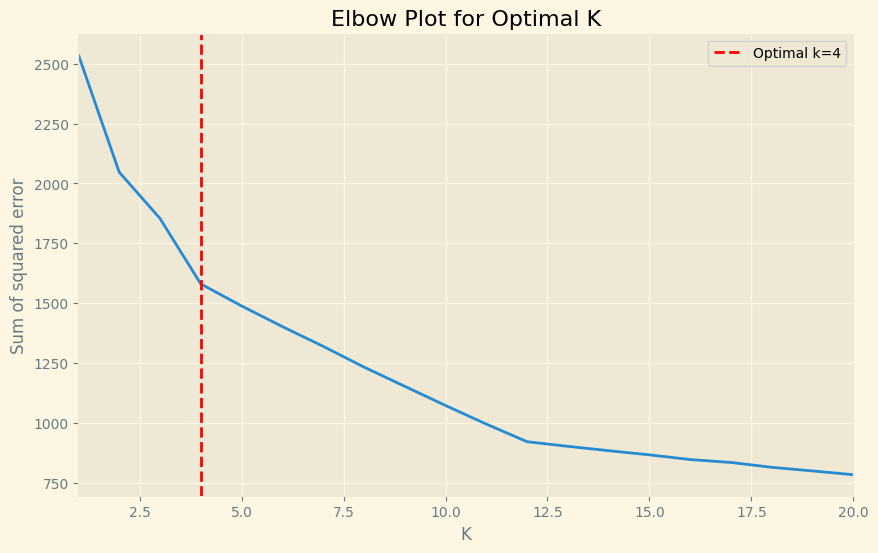

In [ ]:
# @title Kmeans

#new dataframe for Kmeans clustering
df_kmeans =df[["SalesAmount",'ProductCategory','CustomerAge','CustomerGender','CustomerLocation']]

#------------------------------------------------------------------------------------
#scale the Sales Amount in 0-1 scale, othwerise it would have enormous Influence in our clustering method
scaler = MinMaxScaler()
scaler.fit(df_kmeans[["SalesAmount"]])
df_kmeans["SalesAmount"] = scaler.transform(df_kmeans[["SalesAmount"]])




#get dummies of categorical variables , 0-1 because Kmeans calculates distance between points
df_kmeans_dum = pd.get_dummies(df_kmeans,columns=['ProductCategory','CustomerAge','CustomerGender','CustomerLocation'], drop_first=False,dtype=int)
df_kmeans_dum["SalesAmount"]=df_kmeans["SalesAmount"]

sse = []    #list to store inertia
silhouette=[] #list to store silhouette avg score
k_rng = range(1,21)  #all posible number of clusters
for k in k_rng:  #for every K number of cluster

  km = KMeans(n_clusters=k)   #build k Kmeans model
  km.fit(df_kmeans_dum)   #fit the data on the model
  sse.append(km.inertia_)  # store the inertia score for the K running
  cluster_labels = km.labels_  #store the cluster labels for the K running
  if k>1:
    silhouette_avg = silhouette_score(df_kmeans_dum, cluster_labels) #store the slihouette score
    silhouette.append(silhouette_avg)

silhouette.insert(0, 'Nan') #insert Nan for the first value of silhouette list because there is no result for K=0 and we couldn't put the list into our dataframe

#plot a figure for inertia per K

plt.figure(figsize=(10, 6))
sns.lineplot(x = k_rng,  y = sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title("Elbow Plot for Optimal K")
plt.axvline(x=4, color='r',linestyle='--',label='Optimal k=4')
plt.xlim(1,20)
plt.legend()
plt.show()




Build a dataframe with the results Of inertia and calculate the drop of the inertia for every K. After K = 4 the drop is much smaller compared to the previous steps, the decreases become relatively smaller and more consistent. So the best K= 4

In [ ]:
# @title inertia drop for every K


#build a dataframe with the results
Kmeans_result = pd.DataFrame({
    "K": k_rng ,
    "inertia": sse,
    "silhouette": silhouette
    })


for i in range(len(Kmeans_result)-1):
  Kmeans_result.at[i+1,'drop'] = Kmeans_result.at[i,'inertia'] - Kmeans_result.at[i+1,'inertia']
  Kmeans_result.at[i+1,'drop_percentage'] = 100*(Kmeans_result.at[i,'inertia'] - Kmeans_result.at[i+1,'inertia'])/ Kmeans_result.at[i,'inertia']

display(Kmeans_result.T)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
K,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
inertia,2537.522,2047.449,1854.116,1580.819,1488.824,1402.694,1320.365,1233.755,1153.385,1073.376,995.563,922.173,902.744,884.620,867.231,847.636,835.367,815.138,800.099,784.281
silhouette,Nan,0.190,0.163,0.223,0.200,0.198,0.199,0.225,0.250,0.274,0.299,0.323,0.312,0.301,0.302,0.290,0.291,0.288,0.278,0.296
drop,NaN,490.073,193.333,273.297,91.995,86.130,82.329,86.610,80.370,80.009,77.813,73.390,19.429,18.125,17.388,19.595,12.269,20.230,15.038,15.818
drop_percentage,NaN,19.313,9.443,14.740,5.819,5.785,5.869,6.560,6.514,6.937,7.249,7.372,2.107,2.008,1.966,2.260,1.447,2.422,1.845,1.977


"Append the 'cluster' column to our original DataFrame and calculate the basic statistics for each cluster to understand the characteristics of each cluster."



In [ ]:
km_final= KMeans(n_clusters=4)   #build k Kmeans model
km_final.fit(df_kmeans_dum)   #fit the data on the model
cluster_labels_final = km_final.labels_  #store the cluster labels for the K running

df["cluster"]=cluster_labels_final #append the cluster column to original df

In [ ]:
for i in range(0,4):
  print(f'stats for cluster {i}')
  display(df[df["cluster"] == i].describe())
  display(df[df["cluster"] == i].describe(include=['object']))
  print('\n\n')


stats for cluster 0


,SalesDate,SalesAmount,cluster
count,233,233.000,233.000
mean,2023-01-05 04:31:55.879828224,996.944,0.000
min,2022-01-02 00:00:00,22.000,0.000
25%,2022-06-28 00:00:00,597.000,0.000
50%,2023-01-24 00:00:00,996.000,0.000
75%,2023-07-16 00:00:00,1428.000,0.000
max,2023-12-28 00:00:00,1980.000,0.000
std,NaN,532.471,0.000


,ProductCategory,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
count,233,233,233,233,233,233,233,233
unique,3,1,2,6,5,2,12,24
top,Electronics,35,Male,UK,1,2023,Mar,Mar_2022
freq,82,233,228,48,50,122,28,16





stats for cluster 1


,SalesDate,SalesAmount,cluster
count,242,242.000,242.000
mean,2023-01-19 14:40:39.669421568,971.360,1.000
min,2022-01-03 00:00:00,28.000,1.000
25%,2022-07-20 00:00:00,473.250,1.000
50%,2023-01-18 12:00:00,1021.000,1.000
75%,2023-07-21 00:00:00,1395.250,1.000
max,2023-12-31 00:00:00,1942.000,1.000
std,NaN,526.232,0.000


,ProductCategory,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
count,242,242,242,242,242,242,242,242
unique,3,1,1,6,5,2,12,24
top,Clothing,22,Female,Canada,3,2023,Dec,Dec_2023
freq,84,242,242,51,56,130,30,16





stats for cluster 2


,SalesDate,SalesAmount,cluster
count,242,242.000,242.000
mean,2023-01-10 08:25:47.107438080,971.260,2.000
min,2022-01-04 00:00:00,28.000,2.000
25%,2022-06-29 06:00:00,495.000,2.000
50%,2023-02-07 00:00:00,962.000,2.000
75%,2023-06-29 12:00:00,1429.500,2.000
max,2023-12-30 00:00:00,1994.000,2.000
std,NaN,556.488,0.000


,ProductCategory,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
count,242,242,242,242,242,242,242,242
unique,3,1,2,6,5,2,12,24
top,Electronics,35,Female,UK,2,2023,Jun,Jul_2022
freq,89,242,235,56,59,134,28,16





stats for cluster 3


,SalesDate,SalesAmount,cluster
count,263,263.000,263.000
mean,2023-01-12 16:20:04.562737664,980.460,3.000
min,2022-01-03 00:00:00,22.000,3.000
25%,2022-07-04 12:00:00,597.000,3.000
50%,2023-01-26 00:00:00,917.000,3.000
75%,2023-07-22 12:00:00,1448.500,3.000
max,2023-12-30 00:00:00,1980.000,3.000
std,NaN,539.993,0.000


,ProductCategory,CustomerAge,CustomerGender,CustomerLocation,ProductRatings,SalesYear,SalesMonth,Salesym
count,263,263,263,263,263,263,263,263
unique,3,1,2,6,5,2,12,24
top,Electronics,22,Male,USA,3,2023,Jan,Dec_2023
freq,96,263,248,60,58,139,28,19


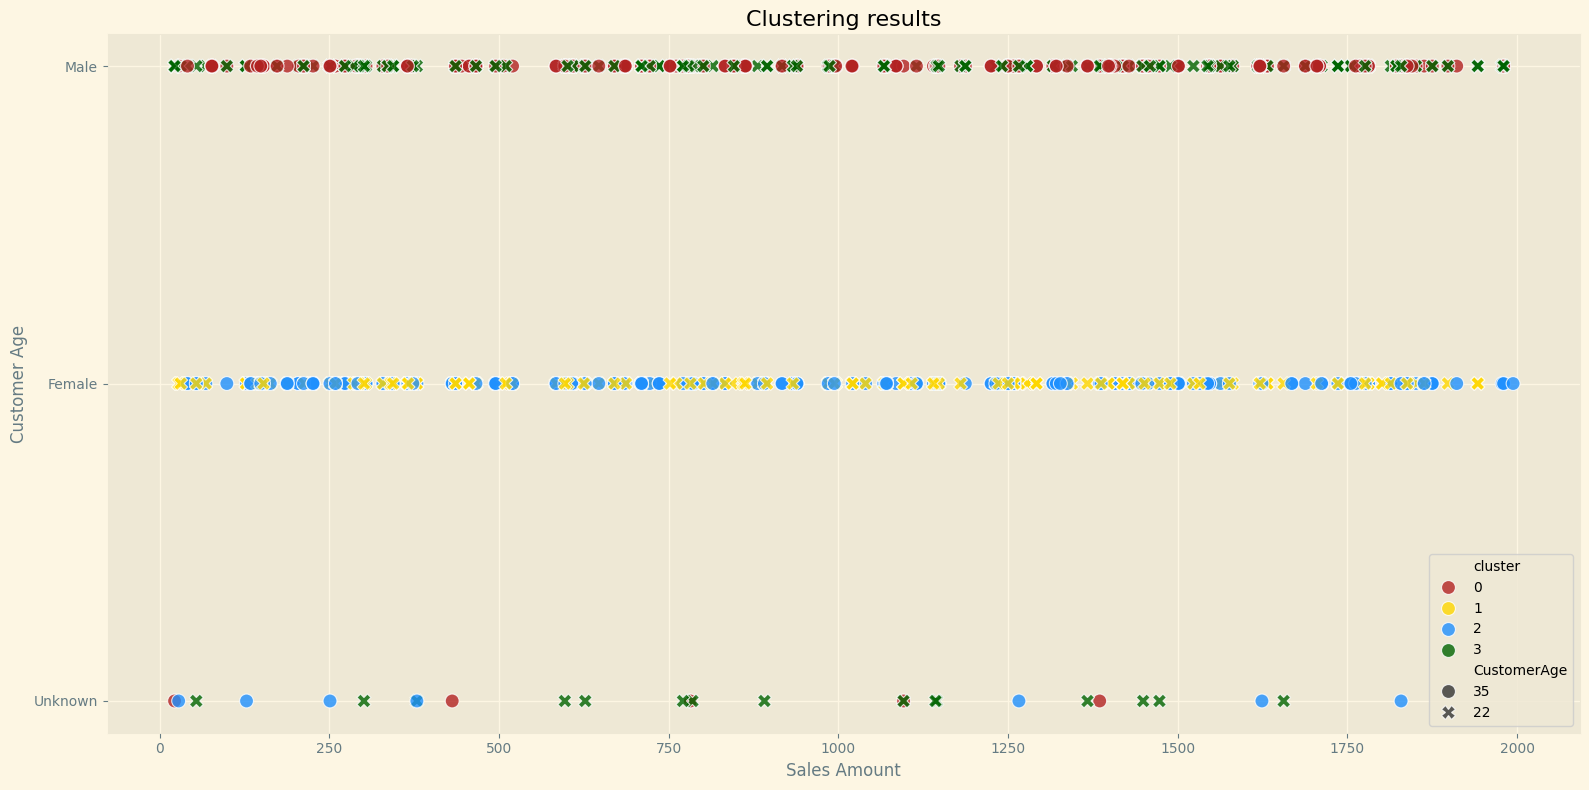

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Clustering results")
plt.xlabel("Sales Amount")
plt.ylabel("Customer Age")
palette=({0: 'firebrick', 1: "gold",2: 'dodgerblue', 3: 'darkgreen'})
sns.scatterplot(style="CustomerAge",x ="SalesAmount", y="CustomerGender", hue="cluster", data=df,palette=palette,alpha=0.8,s=100)
plt.tight_layout()
plt.legend(loc='best')
plt.show()